# **Clasificación**

**Integrantes**

- Kelly Carrascal
- Sebastián Herazo

# **Lectura de Datos**

In [1]:
import pandas as pd
# Leer archivos de transacciones
train_transaction = pd.read_csv('train_transaction.csv')
test_transaction = pd.read_csv('test_transaction.csv')

# Leer archivos de identidad
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')

# Visualizar dimensiones de cada dataset
print("Train Transaction:", train_transaction.shape)
print("Test Transaction:", test_transaction.shape)
print("Train Identity:", train_identity.shape)
print("Test Identity:", test_identity.shape)

# Vista previa de los datasets
print("\nVista previa de train_transaction:")
print(train_transaction.head())

print("\nVista previa de train_identity:")
print(train_identity.head())

Train Transaction: (590540, 394)
Test Transaction: (506691, 393)
Train Identity: (144233, 41)
Test Identity: (141907, 41)

Vista previa de train_transaction:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  N

In [ ]:
# Merge del conjunto de entrenamiento
train_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

# Merge del conjunto de prueba
test_df = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

# Confirmar dimensiones después del merge
print("Train merged shape:", train_df.shape)
print("Test merged shape:", test_df.shape)

# Vista previa del dataset combinado
print("\nVista previa de train_df:")
print(train_df.head())

Train merged shape: (590540, 434)
Test merged shape: (506691, 433)

Vista previa de train_df:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33    

# **Análisis Exploratorio de Datos - EDA**

## Descripción de los tipos de variables

In [ ]:
# Tipos de variables
tipos_variables = train_df.dtypes.value_counts()
print("Tipos de variables en el dataset:\n", tipos_variables)

# Detalle de los tipos por columna
print("\nTipos por columna:")
print(train_df.dtypes)

Tipos de variables en el dataset:
 float64    399
object      31
int64        4
Name: count, dtype: int64

Tipos por columna:
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object


- **Variables tipo float64 (399 columnas):** La mayoría de las columnas del dataset son variables numéricas, lo que indica que estas variables puedan requerir imputación de valores nulos y escalamiento.

- **Variables tipo object (31 columnas):** Estas columnas corresponden a variables categóricas o texto, como códigos de productos, tipos de tarjeta, dominios de correo o firmas digitales. Deberán ser codificadas antes de aplicar modelos de clasificación (con one-hot encoding).

- **Variables tipo int64 (4 columnas):** Estas son variables enteras, posiblemente identificadores o variables binarias como isFraud, que es nuestra variable objetivo. También puede incluir marcas de tiempo o contadores discretos.

## Estadísticas descriptivas básicas

In [ ]:
# Número de observaciones y estadísticas numéricas
stats_basicas = train_df.describe().T
print("Estadísticas básicas:")
display(stats_basicas)

Estadísticas básicas:


,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
id_22,5169.0,1.600271e+01,6.897665e+00,10.000,14.000,14.000,14.00,4.400000e+01
id_24,4747.0,1.280093e+01,2.372447e+00,11.000,11.000,11.000,15.00,2.600000e+01
id_25,5132.0,3.296089e+02,9.746109e+01,100.000,321.000,321.000,371.00,5.480000e+02
id_26,5163.0,1.490703e+02,3.210199e+01,100.000,119.000,149.000,169.00,2.160000e+02


Dado que por el número de columnas (403) es alto, se complica la visualización de las estadisticas de todas las columnas, por lo tanto se mostrarán por partes:

In [ ]:
# Mostrar las estadísticas básicas solo para las primeras 60 columnas
display(train_df.describe().T.iloc[:60])

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3.134635e+06,3.282270e+06,3.429904e+06,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3.027058e+06,7.306528e+06,1.124662e+07,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,4.332100e+01,6.876900e+01,1.250000e+02,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6.019000e+03,9.678000e+03,1.418400e+04,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,2.140000e+02,3.610000e+02,5.120000e+02,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02


- TransactionID: Identificador único, no es informativo para el modelo pero útil para trazabilidad.
- isFraud: Promedio de 0.0349 (3.5%) indica fuerte desbalance de clases (fraudes son minoría).
- TransactionDT: Marca de tiempo relativa. Puede transformarse en variables como día, hora o semana.
- TransactionAmt: Rango desde $0.25 hasta $31,937.39, con media de $135 y mediana de $68.76. Tiene alta dispersión, lo cual indica que podría haber outliers. Además, hay fraudes que suelen estar en montos más pequeños o inusualmente grandes.
- card1, card2, card3, card5: Todas con valores enteros. Pueden representar identificadores codificados del emisor o tipo de tarjeta. Aunque no son numéricas en sentido estricto, podrían actuar como variables categóricas de alta cardinalidad. Se debe considerar codificarlas con técnicas como frequency encoding o reducir su cardinalidad.
- addr1, addr2: Direcciones codificadas, valores bastante concentrados.
- dist1, dist2: Altamente dispersas. dist1 llega a 10,286 y dist2 hasta 11,623, lo cual sugiere valores extremos. Estas variables podrían contener ruido, pero también patrones importantes para identificar ubicaciones frecuentes. Se debe verificar correlación con isFraud.
- C1–C14: Estas variables codifican recuentos de entidades asociadas (por ejemplo, número de emails, tarjetas, etc.): Muchas tienen valores mínimos en 0 y cuartiles muy bajos (ej: Q1 = Q2 = Q3 = 0 o 1). Algunas como C13 llegan hasta valores de 2,918. Aunque no conocemos su significado exacto, su comportamiento disperso sugiere que algunas podrían contener outliers. A pesar de ser codificadas, pueden usarse como variables numéricas directamente.
- D1–D15 (intervalos de tiempo): Medidas de tiempo entre eventos (días, semanas, etc.). Algunos valores negativos en D4, D6, D11, D12, D14, etc., lo que puede representar errores o cálculos relativos. Gran cantidad de valores nulos (como en D6 o D13). Las variables D son muy útiles para medir la frecuencia y tiempo entre transacciones. Se pueden imputar los valores nulos.
- Variables V1–V19 (codificadas por Vesta): Valores cercanos a 1 con desviación estándar baja en muchas (ej: V1, V14). Varios con moda = 1 y mediana = 1 → alta concentración en un solo valor. Algunas (V10, V11, V15–V18) tienen muchos ceros, lo que sugiere comportamiento binario o indicativo. Muchas de estas variables parecen ser flags o scores normalizados. Son candidatas fuertes para clasificación y no requieren transformación adicional, salvo normalización si el modelo lo necesita.


In [ ]:
# Mostrar columnas 60 a 120
display(train_df.describe().T.iloc[60:120])

,count,mean,std,min,25%,50%,75%,max
V20,514467.0,0.847843,0.459451,0.0,1.0,1.0,1.0,15.0
V21,514467.0,0.129684,0.339060,0.0,0.0,0.0,0.0,5.0
V22,514467.0,0.132292,0.359415,0.0,0.0,0.0,0.0,8.0
V23,514467.0,1.034791,0.247681,0.0,1.0,1.0,1.0,13.0
V24,514467.0,1.058097,0.305485,0.0,1.0,1.0,1.0,13.0
V25,514467.0,0.977660,0.185245,0.0,1.0,1.0,1.0,7.0
V26,514467.0,0.988040,0.209302,0.0,1.0,1.0,1.0,13.0
V27,514467.0,0.000776,0.028596,0.0,0.0,0.0,0.0,4.0
V28,514467.0,0.000830,0.031133,0.0,0.0,0.0,0.0,4.0
V29,514467.0,0.387840,0.510652,0.0,0.0,0.0,1.0,5.0


Variables V20 a V79:
  
- Altamente concentradas en 1 o 0: Muchas variables como V20, V23–V26, V41, V46–V47, V61–V67, V65 tienen: Mediana = 1, Mínimo = 0 y Máximo > 1. Probablemente son variables binarias codificadas como scores o flags. Su alta concentración en 1 indica que en la mayoría de los casos se cumple cierta condición predefinida por el sistema de fraude de Vesta. Podrían ser muy relevantes para detectar fraudes.

- Variables con moda en 0, con pocos valores altos: Ej: V21–V22, V27–V34, V50–V52, V57–V60, V63–V74. Estas tienen muchos ceros, pero algunas muestran valores hasta 15 o más (V32, V38, V45, V60). Estas variables probablemente capturan eventos poco frecuentes o desviaciones puntuales. Si bien tienen muchos ceros (como no coincidencias, ausencia de eventos, etc.), los valores más altos podrían ser indicadores fuertes de fraude.

- Variables con valores más altos y varianza mayor: V37–V38, V44–V45, V55–V56, V77–V78. Máximos de hasta 50+ indican presencia de outliers o recuentos altos, lo cual puede ser útil para detección de anomalías. Posiblemente codifican frecuencias, cantidades de intentos, o repeticiones por usuario/tarjeta, y valores atípicos aquí podrían indicar riesgo elevado de fraude.

- Variables con muy baja media y desviación pequeña: V27, V28, V68: media cercana a cero, desviación < 0.03. Estas variables tienen comportamiento casi constante y podrían no aportar mucha información.

In [ ]:
# Mostrar columnas 121 a 180
display(train_df.describe().T.iloc[121:180])

,count,mean,std,min,25%,50%,75%,max
V81,501376.0,0.152696,0.452298,0.0,0.0,0.0,0.000000,19.0
V82,501376.0,0.844610,0.422529,0.0,1.0,1.0,1.000000,7.0
V83,501376.0,0.881965,0.470757,0.0,1.0,1.0,1.000000,7.0
V84,501376.0,0.137145,0.361875,0.0,0.0,0.0,0.000000,7.0
V85,501376.0,0.149788,0.419445,0.0,0.0,0.0,0.000000,7.0
V86,501376.0,1.064885,0.419807,0.0,1.0,1.0,1.000000,30.0
V87,501376.0,1.099456,0.511281,0.0,1.0,1.0,1.000000,30.0
V88,501376.0,0.999246,0.027447,0.0,1.0,1.0,1.000000,1.0
V89,501376.0,0.000902,0.031943,0.0,0.0,0.0,0.000000,2.0
V90,501376.0,0.401862,0.516153,0.0,0.0,0.0,1.000000,5.0


- Variables V81–V94:
  
Variables como V81, V84–V85, V92–V94: muchas con media baja, desviación baja, mediana y cuartiles en 0, pero con máximos hasta 7 o 19.
Variables como V82–V83, V86–V87: altas concentraciones en 1 con desviación algo mayor.

Algunas parecen flags o indicadores de actividad poco frecuente. Las variables con valores más altos (como V81 y V87) podrían representar repeticiones o intensidades inusuales. Como hay muchas concentradas en 0 pero con algunos valores altos, podrían ser útiles para detectar anomalías o comportamientos atípicos.

- Variables V95–V106:

V95: media 1.03, std = 21.03, máximo = 880
V96: std = 40.24, máximo = 1410
V101–V103: similares, con valores máximos >800
V126–V137: ¡valores extremos! Hasta 160,000 o 90,000

Estas variables tienen una dispersión enorme. Aunque la mayoría de los valores son cero, unos pocos alcanzan valores altísimos. Posiblemente representan conteos o acumulaciones.

- Variables V107–V125:
  
Muchas están alrededor de 1.0, con desviaciones < 0.1.
Ejemplo: V107–V122 → todos tienen valores mínimos en 0, máximos en 3–9, pero moda y mediana en 1.

Son muy constantes, casi flags, pero no completamente binarios. Relevantes en modelos de árboles (que separan bien valores aunque sean pocos distintos).

- Variables V126–V137

V126: media = 130, std = 2346, máximo = 160,000
V127–V136: comportamiento similar

Claros outliers, posiblemente acumulaciones o identificadores codificados mal escalados. Aunque podrían contener información útil, deben tratarse antes del modelado.

- Variables V138–V139: muy pocos datos
  
V138 y V139 tienen solo 81,945 observaciones (vs. >500,000 en las demás)
Podrían tener muchos nulos o estar presentes solo en un subconjunto específico.Si su aporte es alto, se puede imputar o usarlas selectivamente. Si no aportan nada, se pueden eliminar por escasa cobertura.


In [ ]:
# Mostrar columnas 181 a 240
display(train_df.describe().T.iloc[181:240])

,count,mean,std,min,25%,50%,75%,max
V141,81945.0,0.037696,0.215133,0.0,0.0,0.0,0.0,5.0000
V142,81945.0,0.048581,0.313888,0.0,0.0,0.0,0.0,9.0000
V143,81951.0,8.397006,55.267545,0.0,0.0,0.0,0.0,869.0000
V144,81951.0,3.708484,10.485633,0.0,0.0,0.0,0.0,62.0000
V145,81951.0,22.112946,64.371860,0.0,0.0,0.0,1.0,297.0000
V146,81945.0,0.156276,0.682328,0.0,0.0,0.0,0.0,24.0000
V147,81945.0,0.168601,0.750497,0.0,0.0,0.0,0.0,26.0000
V148,81945.0,0.765001,0.581425,0.0,0.0,1.0,1.0,20.0000
V149,81945.0,0.775313,0.628191,0.0,0.0,1.0,1.0,20.0000
V150,81951.0,277.598028,829.576922,1.0,1.0,1.0,1.0,3389.0000


- V141–V158:

Variables como V141, V142, V146–V147 tienen medias bajas (∼0.04 a 0.17), desviaciones pequeñas, mediana 0, y valores máximos puntuales hasta 26.
V148–V158 muestran más valores con mediana = 1, aunque también tienen valores máximos de hasta 24.

Las primeras parecen flags esporádicos o condiciones que solo se activan en casos raros. Las de mediana 1 probablemente indican presencia habitual de una característica en transacciones regulares o fraudulentas. Aunque no presentan gran variabilidad, los valores máximos elevados podrían reflejar comportamientos anómalos.

- V159–V166:

V159: media 2719, máx. 55,125
V160: media 47,453, máx. 641,511
V164–V166: máximos de hasta 104,060

Estas variables son las más extremas y dispersas de la serie V. Posiblemente representan acumulaciones, contadores históricos, o puntajes normalizados mal escalados.

- V167–V193:

V167–V179: media baja pero grandes desviaciones → muchos ceros con algunos valores atípicos.
V180–V193: en su mayoría tienen mediana = 1, mínimo = 0, y valores máximos entre 16 y 218.

Se comportan como indicadores de comportamiento repetitivo o intensidad. Si bien la mayoría de los usuarios tiene valores bajos, algunos tienen recuentos altos → probablemente correlacionan con fraude. Estas variables podrían ser muy útiles en modelos no lineales como Random Forest, XGBoost, etc.

- V194–V199:
  
Medias cercanas a 1 (0.94–1.27), desviación muy baja, mediana = 1.
Muy probablemente se usan como banderas binarias o puntajes de similitud, altamente concentradas. Si bien no aportan variabilidad, en combinación con otras variables pueden mejorar la capacidad predictiva del modelo.

In [ ]:
# Mostrar columnas 241 a 300
display(train_df.describe().T.iloc[241:300])

,count,mean,std,min,25%,50%,75%,max
V201,139819.0,1.159106,1.418618,0.0,1.0,1.0,1.0000,55.0
V202,139631.0,444.147142,4683.828419,0.0,0.0,0.0,0.0000,104060.0
V203,139631.0,1078.327538,9105.607991,0.0,0.0,0.0,30.9244,139777.0
V204,139631.0,686.956931,6048.980716,0.0,0.0,0.0,20.0000,104060.0
V205,139631.0,18.060417,266.545451,0.0,0.0,0.0,0.0000,55125.0
V206,139631.0,6.189360,191.474014,0.0,0.0,0.0,0.0000,55125.0
V207,139631.0,72.284098,925.676660,0.0,0.0,0.0,0.0000,55125.0
V208,139819.0,8.888193,59.047125,0.0,0.0,0.0,0.0000,3300.0
V209,139819.0,35.001872,250.800822,0.0,0.0,0.0,0.0000,8050.0
V210,139819.0,14.391835,86.523724,0.0,0.0,0.0,0.0000,3300.0


- Variables con valores extremos

V202–V204: medias bajas, pero desviaciones extremadamente altas → outliers masivos
V211–V216: medias moderadas, pero máximos >100k en varios casos
V205–V207: similares a variables de acumulación o conteo por usuario o tarjeta

Estas variables parecen presentar sesgos extremos y podrían dominar el modelo si no se escalan.

- Variables binarizadas o pseudobinarias

V201, V240–V244, V250–V256: valores promedio entre 0.8 y 1.1, mediana = 1, desviación pequeña

Funcionan como banderas que usualmente están activadas (≈1) y ocasionalmente no lo están (0). Muy útiles en árboles de decisión (LightGBM, Random Forest). Algunas pueden no aportar si tienen varianza casi nula.

- Variables tipo contador o intensidad
V208–V230: algunos con valores bajos y dispersión moderada
V245–V259: valores promedio entre 0.8 y 1.3, pero con máximos elevados, e.g., V259 llega a 285

Son variables que podrían codificar frecuencia o intensidad de ciertos patrones. Aunque sus medias son bajas, los valores máximos altos pueden indicar anomalías. Su inclusión es importante para capturar comportamientos fuera de lo normal, ideales para modelos no lineales

- Variables con alta dispersión específica (V217–V230)
Máximos entre 293 y 55125, muchas veces con Q1 = Q2 = Q3 = 0
Esto sugiere presencia de muchos ceros y unos pocos valores muy grandes


In [ ]:
# Mostrar columnas 301 a 360
display(train_df.describe().T.iloc[301:360])

,count,mean,std,min,25%,50%,75%,max
V261,130430.0,1.107161,1.323230,0.0,1.0,1.0,1.000000,49.000000
V262,130430.0,1.013279,0.625455,0.0,1.0,1.0,1.000000,20.000000
V263,130430.0,117.390676,1294.851543,0.0,0.0,0.0,0.000000,153600.000000
V264,130430.0,201.657617,2284.827492,0.0,0.0,0.0,33.593498,153600.000000
V265,130430.0,153.520534,1605.512276,0.0,0.0,0.0,20.897525,153600.000000
V266,130430.0,9.167839,208.038863,0.0,0.0,0.0,0.000000,55125.000000
V267,130430.0,36.525103,644.878586,0.0,0.0,0.0,0.000000,55125.000000
V268,130430.0,18.813407,311.280181,0.0,0.0,0.0,0.000000,55125.000000
V269,130430.0,5.997508,207.317539,0.0,0.0,0.0,0.000000,55125.000000
V270,141416.0,7.712764,65.507232,0.0,0.0,0.0,0.000000,4000.000000


- Variables V261–V265

V261–V262: muy concentradas en 1, con baja desviación → típicas flags o puntajes normalizados.
V263–V265: presentan desviaciones masivas y máximos de hasta 153,600, con cuartiles en 0.

- Variables V266–V278:

Máximos entre 51,200 y 104,060
Media cercana a 0 en muchas, con cuartiles en 0

Casi todas son sparse: la mayoría de registros tiene 0, pero algunos tienen valores altísimos. Importantes para detección de anomalías, pero pueden ser redundantes entre sí, por lo que es clave analizar correlaciones internas.

- Variables V279–V304:

Algunas como V281, V284, V286, V297–V304: tienen medias muy bajas (cercanas a 0), pero algunos valores máximos relevantes.
V285, V291, V292, V294 muestran valores mayores con máximos >300.

Muchas de estas son banderas con ruido o pseudocontadores. Si bien algunas pueden tener baja varianza, su comportamiento en combinación puede capturar eventos críticos.

-  Variables V305–V319: las más extremas

V306–V308: máximos entre 108,800 y 145,765 con medias bajas → comportamiento claramente sesgado, requieren transformación (np.log1p).
V309–V319: mismas características; gran parte en 0, pero algunos picos muy altos (como V317 = 134,021).

Altamente indicativas de comportamiento atípico o automatizado (bots, abuso de tarjeta, ataques). Aunque presentan valores extremos, su información puede ser muy valiosa para modelos que detecten outliers (ej: XGBoost, RandomForest). También pueden ser ruidosas para modelos lineales sin escalar.

In [ ]:
# Mostrar columnas 361 a 403
display(train_df.describe().T.iloc[361:403])

,count,mean,std,min,25%,50%,75%,max
V321,590528.0,28.326584,382.053171,0.0,0.0,0.0,0.0,104060.0
V322,82351.0,6.220289,56.022561,0.0,0.0,0.0,0.0,880.0
V323,82351.0,13.103775,106.739813,0.0,0.0,0.0,1.0,1411.0
V324,82351.0,9.184612,73.627893,0.0,0.0,0.0,0.0,976.0
V325,82351.0,0.058494,0.304415,0.0,0.0,0.0,0.0,12.0
V326,82351.0,0.851040,3.950295,0.0,0.0,0.0,0.0,44.0
V327,82351.0,0.296633,1.364356,0.0,0.0,0.0,0.0,18.0
V328,82351.0,0.336790,1.580144,0.0,0.0,0.0,0.0,15.0
V329,82351.0,1.312844,8.769083,0.0,0.0,0.0,0.0,99.0
V330,82351.0,0.775874,4.727971,0.0,0.0,0.0,0.0,55.0


- Variables V321–V339

Muchas con cuartiles en 0, pero máximos muy altos (hasta 160,000 en V331–V333). Algunas con dispersión leve (V325–V330) y otras con valores extremos y gran varianza (V331–V339).


- Variables id_01 a id_32 (identidad y dispositivo)

Presenta variables con valores negativos y dispersión amplia: id_01, id_03–id_10, id_14, id_06: contienen valores negativos, probablemente escalas internas, tiempos o puntuaciones. Estas podrían reflejar desplazamientos temporales, normalización de tiempos, puntuaciones u otros efectos relativos. Requieren estandarización para usar en modelos sensibles a escala (como regresión logística o SVM).

- Variables con comportamiento de recuentos o tiempos:
  
id_11: extremadamente estable, con valor fijo en 100 → puede ser poco informativa.
id_13, id_17–id_20: representan valores mayores y dispersos, pueden estar relacionadas con duración de sesiones, días desde último acceso, etc.
id_13, id_17, id_19–id_20 parecen buenas candidatas para modelar comportamiento transaccional.

- Variables posiblemente categóricas codificadas:
  
id_25, id_26, id_32: su bajo número de valores únicos sugiere que pueden ser categóricas numéricas, ideales para encoding o one-hot.
id_24 y id_22: media baja, rango acotado, probablemente flags internos.
Pueden convertirse a tipo categoría, especialmente si se usa un modelo que no requiere estandarización previa.

## Conteo de valores nulos y porcentaje de datos faltantes

In [ ]:
# Conteo y porcentaje de valores nulos
faltantes = train_df.isnull().sum()
faltantes_pct = (faltantes / train_df.shape[0]) * 100

# Crear un DataFrame ordenado para análisis
missing_df = pd.DataFrame({
    'Total_Faltantes': faltantes,
    'Porcentaje': faltantes_pct
}).sort_values(by='Porcentaje', ascending=False)

print("Variables con más valores faltantes:")
display(missing_df[missing_df['Total_Faltantes'] > 0].head(60))


Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
id_24,585793,99.196159
id_25,585408,99.130965
id_07,585385,99.127070
id_08,585385,99.127070
id_21,585381,99.126393
id_26,585377,99.125715
id_27,585371,99.124699
id_23,585371,99.124699
id_22,585371,99.124699
dist2,552913,93.628374


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[61:120])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
V338,508189,86.054967
V339,508189,86.054967
V324,508189,86.054967
V332,508189,86.054967
V325,508189,86.054967
V330,508189,86.054967
V329,508189,86.054967
V328,508189,86.054967
V327,508189,86.054967
V326,508189,86.054967


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[121:180])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
V248,460110,77.913435
V241,460110,77.913435
id_05,453675,76.823755
id_06,453675,76.823755
R_emaildomain,453249,76.751617
id_20,451279,76.418024
id_19,451222,76.408372
id_17,451171,76.399736
V212,450909,76.355370
V211,450909,76.355370


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[181:240])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
id_02,449668,76.145223
id_29,449562,76.127273
id_11,449562,76.127273
id_28,449562,76.127273
id_37,449555,76.126088
id_36,449555,76.126088
id_15,449555,76.126088
id_35,449555,76.126088
id_38,449555,76.126088
V245,449124,76.053104


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[241:300])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
V36,168969,28.612626
V50,168969,28.612626
V48,168969,28.612626
V42,168969,28.612626
V43,168969,28.612626
V44,168969,28.612626
V46,168969,28.612626
V47,168969,28.612626
V45,168969,28.612626
V49,168969,28.612626


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[301:360])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
V32,76073,12.881939
V31,76073,12.881939
V30,76073,12.881939
V29,76073,12.881939
V28,76073,12.881939
V27,76073,12.881939
V25,76073,12.881939
V24,76073,12.881939
V26,76073,12.881939
V16,76073,12.881939


In [ ]:
print("Variables con más valores faltantes:")
# display(train_df.describe().T.iloc[361:403])
display(missing_df[missing_df['Total_Faltantes'] > 0].iloc[361:403])

Variables con más valores faltantes:


,Total_Faltantes,Porcentaje
V130,314,0.053172
V129,314,0.053172
V128,314,0.053172
V127,314,0.053172
V126,314,0.053172
V125,314,0.053172
V124,314,0.053172
V123,314,0.053172
V122,314,0.053172
V121,314,0.053172


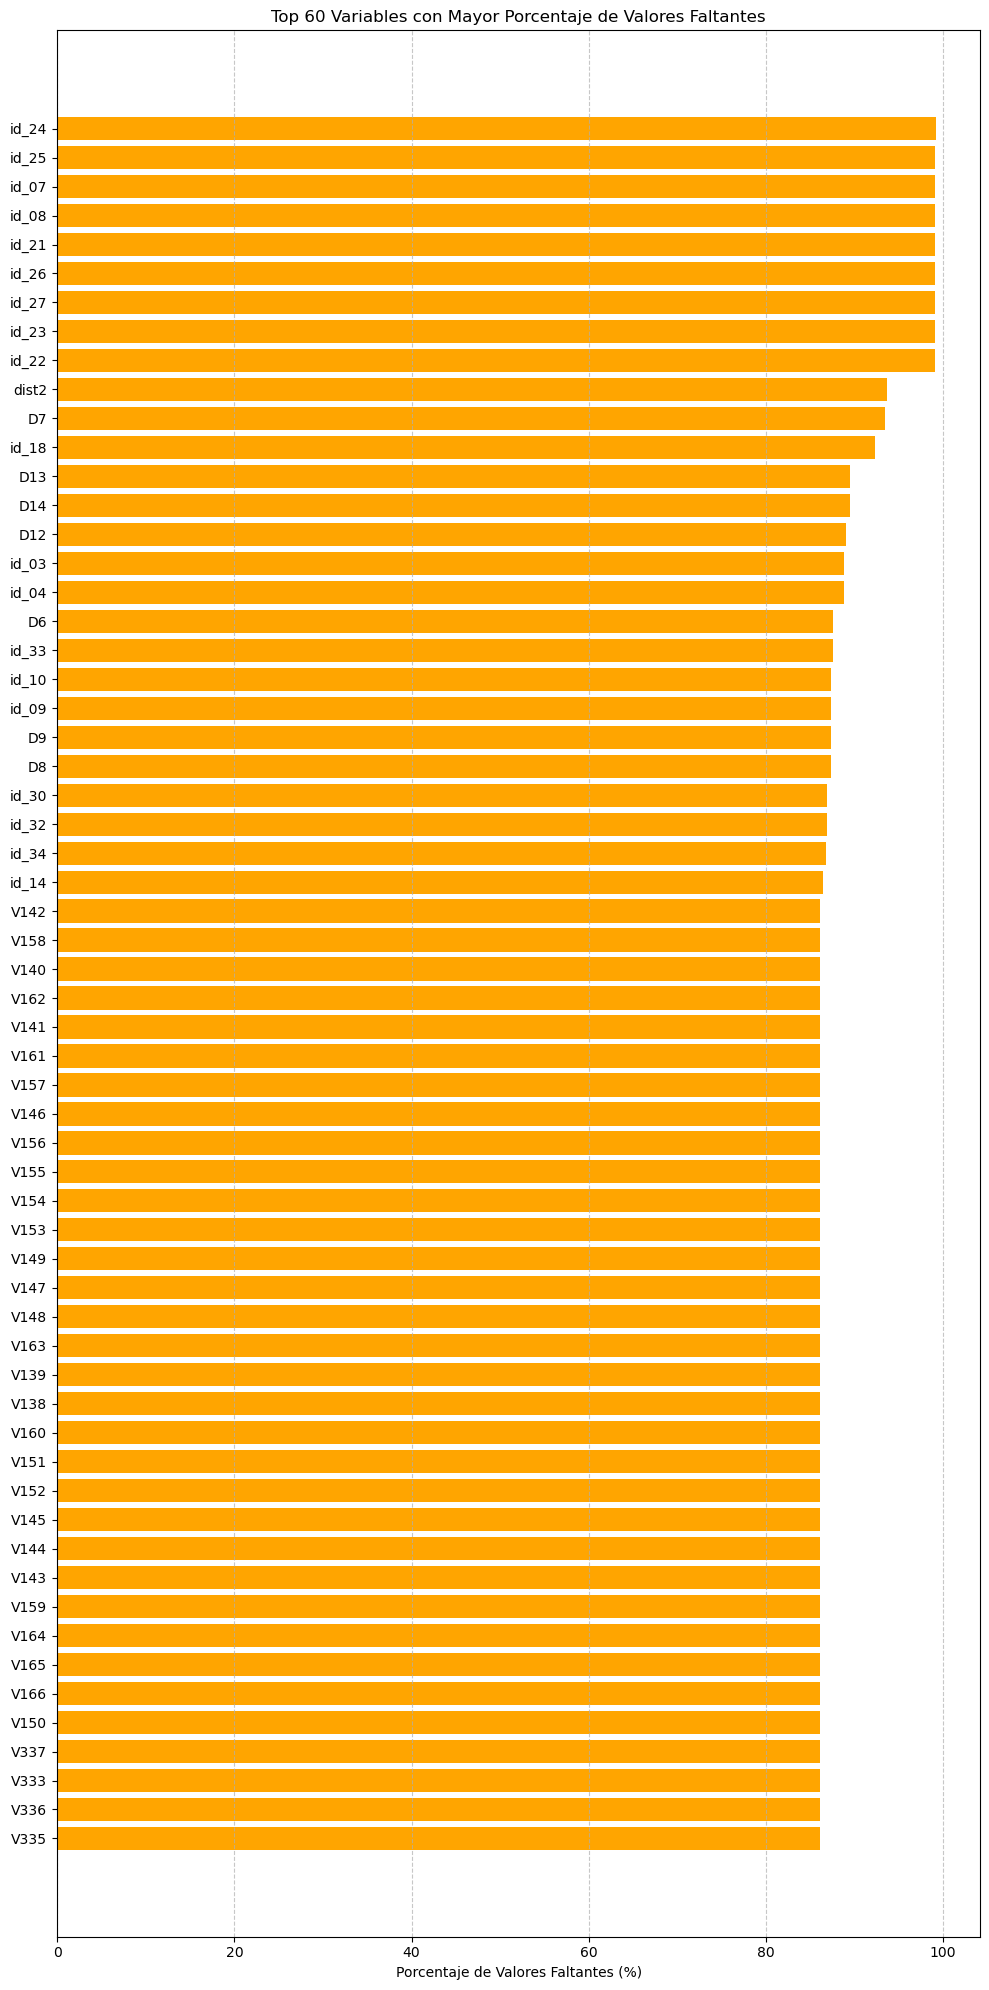

In [ ]:
# Crear el gráfico a partir del DataFrame `missing_df` ya calculado
top_missing = missing_df.head(60)  # Top 60 variables con más valores faltantes

plt.figure(figsize=(10, 20))
plt.barh(top_missing.index, top_missing['Porcentaje'], color='orange')
plt.xlabel('Porcentaje de Valores Faltantes (%)')
plt.title('Top 60 Variables con Mayor Porcentaje de Valores Faltantes')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. Variables con >99% de valores faltantes

id_24, id_25	~99.2%	Casi completamente vacías. Eliminación recomendada.

id_07 a id_27	~99.1%	Información casi ausente de identidad/dispositivo. Salvo que sean críticas, deben eliminarse.


- Interpretación: Estas variables están prácticamente vacías. Aunque podrían ser importantes en contextos particulares (ej: para ciertos emisores), el costo de imputarlas sería muy alto y su calidad baja → candidatas para eliminación.

2. Variables con entre 85% y 99% de valores faltantes

Variables de identidad y temporales:

id_03–id_04, id_09–id_14, id_30–id_34

D6, D7, D8, D9, D12–D14

- Interpretación: Muchas de estas variables miden intervalos de tiempo entre eventos (D#) o características específicas de usuarios (id_#). Si bien están incompletas, pueden ser valiosas: los pocos valores que tienen podrían detectar patrones únicos de fraude (como recurrencia temporal).
Se consevarán temporalmente y se evaluará su importancia con feature importance o modelos de prueba. Si no aportan, se eliminaran más adelante.

3. Variables V (V138–V166), altamente faltantes:

Variables destacadas	% Faltantes	Observaciones

V140–V166	~86.1%	Sparse, con valores extremos → posibles outliers.

V153–V160, V138–V149	~86.1%	Muchas tienen distribución tipo flag o score.

V333–V337, V335	~86.05%	Valores extremadamente altos → riesgo de ruido.

- Interpretación: Aunque faltantes, estas variables de Vesta fueron diseñadas para capturar picos de comportamiento y señales de riesgo. Dado que son variables técnicas y posiblemente muy predictivas, se revisará si se pueden imputar.

In [ ]:
print("Variables sin  valores faltantes:")
display(missing_df[missing_df['Total_Faltantes'] == 0].iloc[0:60])

Variables sin  valores faltantes:


,Total_Faltantes,Porcentaje
C9,0,0.0
C14,0,0.0
C13,0,0.0
C12,0,0.0
C11,0,0.0
C10,0,0.0
TransactionDT,0,0.0
TransactionAmt,0,0.0
ProductCD,0,0.0
C6,0,0.0


Estas variables están completamente disponibles, es decir, no requieren imputación ni tratamiento de valores nulos. Esto las convierte en candidatas para ser incluidas directamente en el modelado inicial.

- Variables de transacción: Estas variables son claves para detectar patrones como hora del fraude, montos sospechosos o productos vulnerables. TransactionAmt y TransactionDT deberían usarse tanto en bruto como transformadas (log, horas, bins, etc.)
- Variable objetivo - isFraud: es la variable binaria que se debe utilizar como target en todos los modelos supervisados.
-  Variables C1-C14 (características codificadas de recuento): Estas variables representan recuentos agregados de usuarios, tarjetas o direcciones. Dado que no tienen faltantes, pueden incluirse directamente y evaluarse mediante análisis de importancia o correlación.
-  Variable card1: candidata directa al modelo, aunque si el cardinal es alto podría requerir encoding.

In [ ]:
# Seleccionar columnas numéricas
numeric_cols = train_df.select_dtypes(include=['number']).columns

# Conservar solo columnas SIN nulos
complete_numeric_cols = [col for col in numeric_cols if train_df[col].isnull().sum() == 0]

# Crear DataFrame solo con esas columnas completas
numeric_df = train_df[complete_numeric_cols]
numeric_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2987000,0,86400,68.50,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,2987001,0,86401,29.00,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,2987002,0,86469,59.00,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2987003,0,86499,50.00,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,2987004,0,86506,50.00,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,3577536,0,15811049,39.50,10444,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,3577537,0,15811079,30.95,12037,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,3577538,0,15811088,117.00,7826,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [ ]:
# Estandarizar los datos para el cálculo de VIF
X_scaled = StandardScaler().fit_transform(numeric_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=complete_numeric_cols)

In [ ]:
# Función de reducción iterativa basada en VIF
def reduce_vif(dataframe, threshold=10.0):
    variables = dataframe.columns.tolist()
    while True:
        vif = pd.Series(
            [variance_inflation_factor(dataframe[variables].values, i) for i in range(len(variables))],
            index=variables
        )
        max_vif = vif.max()
        if max_vif < threshold:
            break
        drop_var = vif.idxmax()
        variables.remove(drop_var)
    final_vif = vif[variables].sort_values()
    return dataframe[variables], final_vif

# Reducir multicolinealidad
reduced_df, final_vif_series = reduce_vif(X_scaled_df)

# Mostrar resultado
final_vif_df = final_vif_series.reset_index()
final_vif_df.columns = ['Variable', 'VIF']
final_vif_df

,Variable,VIF
0,C3,1.000264
1,card1,1.000439
2,TransactionAmt,1.001639
3,isFraud,1.002402
4,TransactionDT,1.005310
5,C7,4.170043
6,C14,4.955245
7,C5,7.022934
8,C9,7.591036


## Imputación  de datos faltantes variables numericas

In [ ]:
# Seleccionar variables numéricas con ≤ 95% de valores faltantes
numeric_cols = train_df.select_dtypes(include=['number']).columns
missing_pct = train_df[numeric_cols].isnull().mean()
filtered_cols = missing_pct[missing_pct <= 0.95].index.tolist()

# Subset del DataFrame original con esas columnas
subset_df = train_df[filtered_cols]

# Aplicar imputación con la mediana
imputer = SimpleImputer(strategy='median')
subset_imputed = pd.DataFrame(imputer.fit_transform(subset_df), columns=filtered_cols)
subset_imputed

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_32
0,2987000.0,0.0,86400.0,68.50,13926.0,361.0,150.0,142.0,315.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
1,2987001.0,0.0,86401.0,29.00,2755.0,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
2,2987002.0,0.0,86469.0,59.00,4663.0,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
3,2987003.0,0.0,86499.0,50.00,18132.0,567.0,150.0,117.0,476.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
4,2987004.0,0.0,86506.0,50.00,4497.0,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,100.0,52.0,-480.0,166.0,15.0,542.0,144.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535.0,0.0,15811047.0,49.00,6550.0,361.0,150.0,226.0,272.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590536,3577536.0,0.0,15811049.0,39.50,10444.0,225.0,150.0,224.0,204.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590537,3577537.0,0.0,15811079.0,30.95,12037.0,595.0,150.0,224.0,231.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590538,3577538.0,0.0,15811088.0,117.00,7826.0,481.0,150.0,224.0,387.0,87.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0


In [ ]:
faltantes_subset_imputed = subset_imputed.isnull().sum()
faltantes_subset_imputed.head(30)

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
card1             0
card2             0
card3             0
card5             0
addr1             0
addr2             0
dist1             0
dist2             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
dtype: int64

## Implementación de Variance Inflation Factor (VIF)

In [ ]:
vif_selected_cols = []

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[0:66]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)
vif_selected_cols

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C3',
 'C5',
 'C7',
 'C9',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25']

In [ ]:
3:25 - 4:25

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[67:132]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)
vif_selected_cols

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C3',
 'C5',
 'C7',
 'C9',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V27',
 'V29',
 'V32',
 'V34',
 'V35',
 'V37',
 'V38',
 'V40',
 'V41',
 'V43',
 'V44',
 'V46',
 'V47',
 'V49',
 'V52',
 'V53',
 'V55',
 'V56',
 'V60',
 'V61',
 'V62',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V70',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V82',
 'V83',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V91']

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[133:199]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)

# Ver VIF de las columnas que quedaron
final_vif = vif[variables].sort_values()
final_vif


V138    1.659009
V98     1.864587
V107    2.035538
V121    2.703271
V104    2.869434
V143    2.983377
V139    3.197059
V112    3.236291
V118    3.399283
V93     3.502572
V94     3.504379
V129    3.686698
V109    3.760020
V144    4.015608
V115    4.115738
V130    4.272185
V114    4.353837
V111    4.391363
V124    4.556678
V135    4.581669
V142    4.583553
V152    4.719987
V120    4.851132
V123    5.218288
V141    5.348912
V122    5.491571
V110    5.498297
V99     5.715833
V108    6.012980
V154    6.278436
V100    7.161151
V157    7.288001
V131    7.452064
V125    7.510261
V117    7.933902
V119    8.268728
V147    8.296961
V136    8.618572
V146    9.497666
dtype: float64

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[200:266]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)

# Ver VIF de las columnas que quedaron
final_vif = vif[variables].sort_values()
final_vif

V206    1.062627
V221    1.326878
V217    1.540337
V220    2.090142
V224    2.187630
V208    2.190602
V184    2.308657
V173    2.449704
V214    2.469560
V187    2.674020
V164    2.792220
V169    2.864874
V160    2.892784
V188    3.298046
V209    3.302804
V223    3.579242
V198    3.743097
V166    4.250178
V162    4.985811
V174    5.313068
V161    5.456369
V170    5.542130
V181    5.610370
V172    6.243704
V176    6.456050
V194    6.823013
V201    6.992075
V175    7.924796
V197    8.978615
V199    9.876015
dtype: float64

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[267:330]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)

# Ver VIF de las columnas que quedaron
final_vif = vif[variables].sort_values()
final_vif

V234    1.536304
V286    1.592661
V281    2.129453
V250    2.162217
V241    2.247434
V269    2.289494
V240    2.294727
V284    2.372280
V228    2.643642
V238    2.796147
V283    2.881142
V260    3.061387
V282    3.141750
V244    3.393767
V285    3.547246
V247    4.243113
V252    4.245778
V235    4.396083
V287    4.534993
V257    4.555646
V277    5.103895
V267    5.455447
V288    6.019064
V289    6.422247
V231    6.994886
V227    7.083313
V270    7.154355
V271    7.308091
V279    7.755032
V262    8.411379
V261    8.568753
V280    8.709746
V263    9.700368
V259    9.773392
dtype: float64

In [ ]:
# Tomar un bloque
block_cols = subset_imputed.columns[331:396]  # Cambiar el rango en cada celda

X_block = subset_imputed[block_cols].copy()
X_scaled = StandardScaler().fit_transform(X_block)
X_scaled_df = pd.DataFrame(X_scaled, columns=block_cols)

# Eliminar variables con VIF >= 10
variables = X_scaled_df.columns.tolist()
while True:
    vif = pd.Series([variance_inflation_factor(X_scaled_df[variables].values, i)
                     for i in range(len(variables))], index=variables)
    if vif.max() < 10:
        break
    drop_var = vif.idxmax()
    variables.remove(drop_var)

# Guardar las variables válidas
vif_selected_cols.extend(variables)

# Ver VIF de las columnas que quedaron
final_vif = vif[variables].sort_values()
final_vif

V305     1.000021
id_13    1.071821
id_11    1.079126
id_19    1.086270
id_18    1.174808
id_01    1.211830
id_04    1.213003
id_10    1.251667
id_14    1.272417
V291     1.276744
id_05    1.281570
id_32    1.317660
id_02    1.329812
id_20    1.340535
id_06    1.361256
V325     1.603788
V337     1.626625
id_03    1.642178
V319     1.651538
id_09    1.655450
id_17    2.120777
V310     2.552036
V313     2.647994
V314     2.756713
V293     3.248799
V326     3.357633
V334     3.595379
V312     4.287829
V328     5.232284
V297     5.457074
V296     5.550280
V311     6.094067
V309     6.678295
V303     6.883308
V302     7.100513
V301     7.374564
V300     7.552507
dtype: float64

In [ ]:
vif_selected_cols

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C3',
 'C5',
 'C7',
 'C9',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V27',
 'V29',
 'V32',
 'V34',
 'V35',
 'V37',
 'V38',
 'V40',
 'V41',
 'V43',
 'V44',
 'V46',
 'V47',
 'V49',
 'V52',
 'V53',
 'V55',
 'V56',
 'V60',
 'V61',
 'V62',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V70',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V82',
 'V83',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V91',
 'V93',
 'V94',
 'V98',
 'V99',
 'V100',
 'V104',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V114',
 'V115',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V129',
 'V130',
 'V131',

In [ ]:
#  'vif_selected_cols' contiene las columnas que pasaron VIF < 10
vif_df_parcial = subset_imputed[vif_selected_cols]

# Guardar el avance como archivo CSV
vif_df_parcial.to_csv("vif_reduccion_parcial.csv", index=False)
vif_df_parcial

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_32
0,0.0,86400.0,68.50,13926.0,361.0,150.0,142.0,315.0,87.0,19.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
1,0.0,86401.0,29.00,2755.0,404.0,150.0,102.0,325.0,87.0,8.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
2,0.0,86469.0,59.00,4663.0,490.0,150.0,166.0,330.0,87.0,287.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
3,0.0,86499.0,50.00,18132.0,567.0,150.0,117.0,476.0,87.0,8.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
4,0.0,86506.0,50.00,4497.0,514.0,150.0,102.0,420.0,87.0,8.0,...,0.0,0.0,100.0,52.0,-480.0,166.0,15.0,542.0,144.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,15811047.0,49.00,6550.0,361.0,150.0,226.0,272.0,87.0,48.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590536,0.0,15811049.0,39.50,10444.0,225.0,150.0,224.0,204.0,87.0,8.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590537,0.0,15811079.0,30.95,12037.0,595.0,150.0,224.0,231.0,87.0,8.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0
590538,0.0,15811088.0,117.00,7826.0,481.0,150.0,224.0,387.0,87.0,3.0,...,0.0,0.0,100.0,52.0,-300.0,166.0,15.0,341.0,472.0,24.0


In [ ]:
vif_df_parcial.dtypes.value_counts()

float64    234
Name: count, dtype: int64

In [ ]:
import pickle

with open("vif_columnas_guardadas.pkl", "wb") as f:
    pickle.dump(vif_selected_cols, f)


In [ ]:
subset_imputed.dtypes.value_counts()

float64    396
Name: count, dtype: int64

## Imputación de datos faltantes variables categóricas

In [ ]:
# Filtrar solo columnas categóricas
cat_vars = train_df.select_dtypes(include='object')

# Contar nulos por columna
nulos_cat = cat_vars.isnull().sum()

# Proporción de nulos (%)
proporcion_nulos = (nulos_cat / len(train_df)) * 100

# Juntar en un DataFrame
nulos_df = pd.DataFrame({
    "Nulos": nulos_cat,
    "Proporción (%)": proporcion_nulos
})

# Ordenar de mayor a menor por proporción
nulos_df = nulos_df[nulos_df["Nulos"] > 0].sort_values("Proporción (%)", ascending=False)
nulos_df


,Nulos,Proporción (%)
id_23,585371,99.124699
id_27,585371,99.124699
id_33,517251,87.589494
id_30,512975,86.865411
id_34,512735,86.824771
DeviceInfo,471874,79.905510
id_16,461200,78.098012
R_emaildomain,453249,76.751617
id_31,450258,76.245132
DeviceType,449730,76.155722


In [ ]:
# Identificar columnas a eliminar (más del 95% de nulos)
columnas_a_eliminar = proporcion_nulos[proporcion_nulos > 95].index.tolist()

# Crear copia del subset categórico
subset_imputed_cat = cat_vars.drop(columns=columnas_a_eliminar).copy()

# 5. Imputar con la moda en las columnas restantes con nulos
for col in subset_imputed_cat.columns:
    if subset_imputed_cat[col].isnull().sum() > 0:
        moda = subset_imputed_cat[col].mode()[0]
        subset_imputed_cat[col].fillna(moda, inplace=True)

subset_imputed_cat

C:\Users\kcarrascal\AppData\Local\Temp\ipykernel_34548\2969474835.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_imputed_cat[col].fillna(moda, inplace=True)


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,gmail.com,gmail.com,T,T,T,M2,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,W,mastercard,credit,gmail.com,gmail.com,T,T,T,M0,T,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,W,visa,debit,outlook.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,W,mastercard,debit,yahoo.com,gmail.com,T,T,T,M0,T,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,H,mastercard,credit,gmail.com,gmail.com,T,T,T,M0,F,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,T,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
590536,W,mastercard,debit,gmail.com,gmail.com,T,F,F,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
590537,W,mastercard,debit,gmail.com,gmail.com,T,F,F,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
590538,W,mastercard,debit,aol.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows


## Variables Categoricas: Multicolinealidad usando la prueba chi2_contingency()

In [ ]:
# Lista de variables categóricas
cat_columns = subset_imputed_cat.columns
chi2_results = []

# Iterar por todas las combinaciones de pares
for var1, var2 in combinations(cat_columns, 2):
    contingency_table = pd.crosstab(subset_imputed_cat[var1], subset_imputed_cat[var2])

    # Evitar tablas vacías o triviales
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        continue

    try:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.append((var1, var2, p))
    except:
        continue  # Ignora si hay algún error con datos problemáticos

# Crear DataFrame de resultados
chi2_df = pd.DataFrame(chi2_results, columns=['Variable 1', 'Variable 2', 'p-value'])

# Ordenar por p-value (menor p = mayor asociación)
chi2_df.sort_values('p-value', inplace=True)
chi2_df.reset_index(drop=True, inplace=True)

In [ ]:
chi2_df

,Variable 1,Variable 2,p-value
0,ProductCD,card4,0.0
1,M8,id_15,0.0
2,M8,id_12,0.0
3,M8,M9,0.0
4,M7,DeviceType,0.0
...,...,...,...
401,M1,id_36,1.0
402,M1,id_33,1.0
403,M1,id_31,1.0
404,M1,id_30,1.0


In [ ]:
pares_altamente_asociados = chi2_df[chi2_df['p-value'] < 0.05]
pares_altamente_asociados

,Variable 1,Variable 2,p-value
0,ProductCD,card4,0.000000e+00
1,M8,id_15,0.000000e+00
2,M8,id_12,0.000000e+00
3,M8,M9,0.000000e+00
4,M7,DeviceType,0.000000e+00
...,...,...,...
375,M5,M9,7.613105e-29
376,id_34,id_36,3.187202e-20
377,M6,M9,8.720692e-15
378,id_12,id_29,2.175574e-07


In [ ]:
from collections import Counter

# Contar cuántas veces aparece cada variable en los pares con asociación fuerte
variables_contadas = Counter(pares_altamente_asociados['Variable 1'].tolist() +
                             pares_altamente_asociados['Variable 2'].tolist())

# Ver las más frecuentes (más asociadas con otras)
top_repetidas=variables_contadas.most_common(10)
top_repetidas

[('M3', 28),
 ('M2', 28),
 ('ProductCD', 27),
 ('M8', 27),
 ('M7', 27),
 ('M6', 27),
 ('M9', 27),
 ('M4', 27),
 ('M5', 27),
 ('id_38', 27)]

In [ ]:
print(subset_imputed_cat.shape)         # Verifica dimensiones
print(subset_imputed_cat.columns)       # Asegúrate de que se eliminaron

(590540, 29)
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [ ]:
variables_a_eliminar = [
    'M3', 'M2', 'ProductCD', 'M8', 'M7',
    'M6', 'M9', 'M4', 'M5', 'id_38'
]

subset_imputed_cat.drop(columns=variables_a_eliminar, inplace=True)

In [ ]:
print(subset_imputed_cat.shape)         # Verifica dimensiones
print(subset_imputed_cat.columns)       # Asegúrate de que se eliminaron


(590540, 19)
Index(['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'id_12',
       'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [ ]:
# Concatenación horizontal por índice
df_train_new = pd.concat([vif_df_parcial, subset_imputed_cat], axis=1)
print(df_train_new.shape)
df_train_new.head()

(590540, 253)


,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,DeviceType,DeviceInfo
0,0.0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,19.0,...,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,desktop,Windows
1,0.0,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,8.0,...,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,desktop,Windows
2,0.0,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,287.0,...,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,desktop,Windows
3,0.0,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,8.0,...,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,desktop,Windows
4,0.0,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,8.0,...,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,mobile,SAMSUNG SM-G892A Build/NRD90M


## Visualización de las variables

isFraud
0.0    569877
1.0     20663
Name: count, dtype: int64


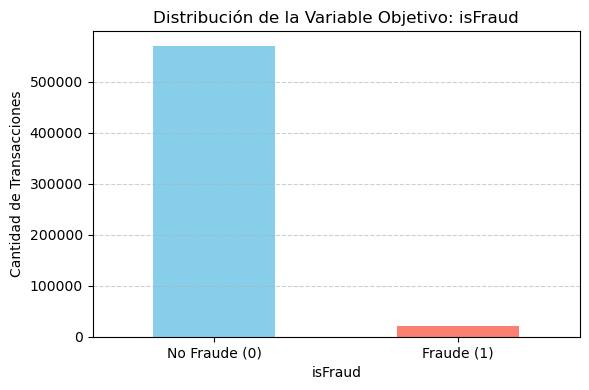

In [ ]:
# Contar valores
fraud_counts = df_train_new['isFraud'].value_counts()
print(fraud_counts)

# Gráfico
plt.figure(figsize=(6, 4))
train_df['isFraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Fraude (0)', 'Fraude (1)'], rotation=0)
plt.ylabel('Cantidad de Transacciones')
plt.title('Distribución de la Variable Objetivo: isFraud')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- **Desbalance de clases:**

Solo el 3.5% de las transacciones corresponde a fraudes. El 96.5% restante son transacciones legítimas. Esto confirma que es un problema altamente desbalanceado, típico en detección de fraudes reales.

In [ ]:
# Separar variables independientes y target
X = df_train_new.drop(columns=['isFraud'])
y = df_train_new['isFraud']

# Detectar tipo de variable
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Codificar variables categóricas temporalmente para mutual_info
X_encoded = X.copy()
le = LabelEncoder()
for col in cat_cols:
    try:
        X_encoded[col] = le.fit_transform(X[col])
    except:
        X_encoded[col] = X[col].astype(str)  # por si hay errores con NaNs o tipos mixtos

# Calcular importancia
importancias = mutual_info_classif(X_encoded, y, discrete_features=[col in cat_cols for col in X.columns])

# Crear DataFrame con resultados
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias,
    'Tipo': ['Categórica' if col in cat_cols else 'Numérica' for col in X.columns]
}).sort_values(by='Importancia', ascending=False)


In [ ]:
importancia_df

,Variable,Importancia,Tipo
150,V198,1.716813e-01,Numérica
7,addr2,1.641189e-01,Numérica
122,V139,1.582890e-01,Numérica
48,V23,1.578967e-01,Numérica
81,V77,1.569376e-01,Numérica
...,...,...,...
248,id_36,1.326265e-08,Categórica
213,V326,0.000000e+00,Numérica
91,V89,0.000000e+00,Numérica
76,V68,0.000000e+00,Numérica


En el marco del análisis de importancia de las variables predictoras con respecto a la variable objetivo isFraud, se empleó la métrica de información mutua (mutual_info_classif). Esta técnica permite identificar cuánto conocimiento aporta cada variable individualmente al momento de predecir si una transacción es fraudulenta o no, proporcionando así un criterio sólido para la selección de características.

Los resultados muestran que las variables V198, addr2, V139, V23 y V77 se destacan como las más relevantes del conjunto de datos, con valores de importancia superiores a 0.15. Estas variables numéricas presentan patrones significativamente diferenciadores entre las clases de fraude (isFraud = 1) y no fraude (isFraud = 0). Por ejemplo, addr2, relacionada posiblemente con información geográfica, podría reflejar comportamientos atípicos de ubicación en transacciones fraudulentas. Por su parte, variables como V198 y V139 podrían estar capturando características transaccionales internas del sistema que son altamente sensibles a cambios en el comportamiento de los usuarios, y por ende, útiles para la detección de fraudes.

En contraste, un grupo considerable de variables, entre ellas id_36, V326, V89, V68 y V173, presentan una importancia nula (valor de 0.0), lo cual sugiere que no aportan información estadísticamente significativa para predecir la variable objetivo. En términos prácticos, estas variables podrían considerarse candidatas a ser eliminadas del conjunto de datos, ya que su inclusión podría introducir ruido, aumentar la dimensionalidad del problema y ralentizar innecesariamente el proceso de entrenamiento de los modelos.

En resumen, la información mutua ha permitido no solo identificar las variables con mayor potencial predictivo, sino también orientar un proceso de depuración del dataset que contribuirá a mejorar la eficiencia y precisión de los modelos de detección de fraude en etapas posteriores del análisis.

In [ ]:
# Seleccionar top 5 de cada tipo
top_num = importancia_df[importancia_df['Tipo'] == 'Numérica'].head(5)['Variable'].tolist()
top_cat = importancia_df[importancia_df['Tipo'] == 'Categórica'].head(5)['Variable'].tolist()

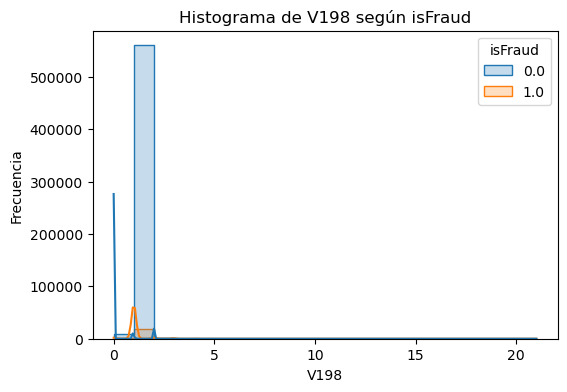

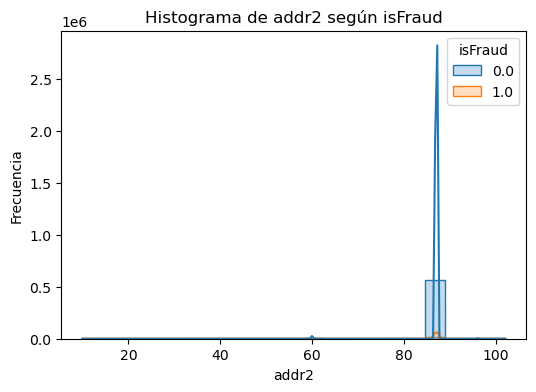

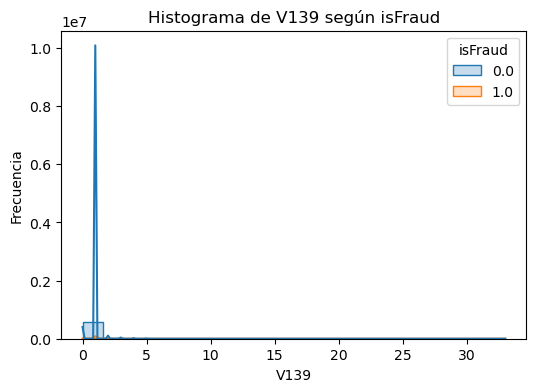

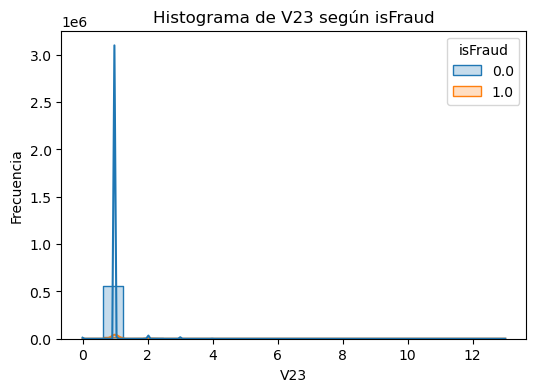

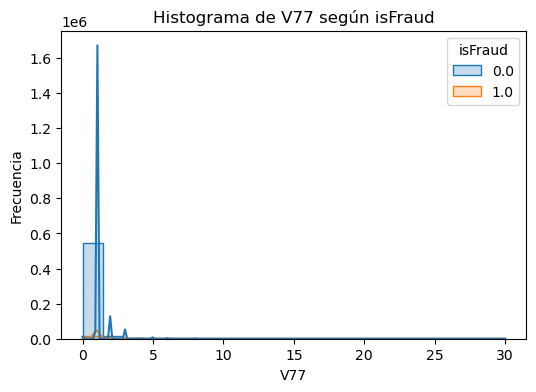

In [ ]:
# Histogramas para variables numéricas
for var in top_num:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_train_new, x=var, hue='isFraud', kde=True, element='step')
    plt.title(f'Histograma de {var} según isFraud')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()



1. **La variable V198** muestra una distribución altamente sesgada a la izquierda, con la mayoría de las observaciones concentradas en un rango muy estrecho cerca de cero. Sin embargo, se evidencia una ligera diferencia en el comportamiento de las transacciones fraudulentas (isFraud = 1), cuya distribución presenta una mayor dispersión en comparación con las no fraudulentas. Esto sugiere que valores extremos o desviaciones en V198 podrían ser indicativos de actividad inusual asociada al fraude.

2. **La variable addr2** posiblemente representa una codificación geográfica secundaria, presenta una distribución fuertemente dominada por un único valor (alrededor de 87), lo cual indica que una gran parte de las transacciones proviene de una misma localización o región. No obstante, hay una pequeña proporción de valores diferentes (outliers), donde también se presentan algunas transacciones fraudulentas. Esto puede reflejar que ciertas ubicaciones menos frecuentes están correlacionadas con un mayor riesgo de fraude.

3. **La variable V139**
V139 es otra variable con una distribución muy sesgada y con una gran densidad de valores cercanos a cero. Las observaciones fraudulentas tienden a diferenciarse ligeramente de las no fraudulentas en rangos específicos, lo que indica que esta variable captura alguna característica interna del proceso transaccional que puede ser aprovechada para la detección del fraude. A pesar de su concentración, los valores atípicos parecen ser más frecuentes en la clase fraudulenta.

4. **La variable V23**
En V23, al igual que en las anteriores, se observa un fuerte sesgo a la izquierda y una gran acumulación de datos en valores bajos. La diferencia entre las clases isFraud=0 e isFraud=1 es poco notoria a simple vista, pero podrían existir patrones más sutiles que podrían ser detectados mediante algoritmos de modelado supervisado. La presencia de valores atípicos también está más marcada en las transacciones fraudulentas.

5. **La variable V77**
La variable V77 presenta una distribución similar a V139 y V23, con un comportamiento claramente sesgado a la izquierda y valores acumulados en torno a cero. En este caso, también se observa una mayor dispersión en la distribución de las observaciones correspondientes a fraudes, lo que indica que los valores de esta variable podrían estar influidos por comportamientos atípicos de los usuarios o por características transaccionales específicas.

**Conclusión**
Las cinco variables analizadas presentan distribuciones altamente asimétricas, con gran concentración de valores bajos y presencia de outliers, lo cual es típico en problemas financieros o transaccionales. Aunque visualmente la diferencia entre clases no siempre es marcada, la importancia estadística calculada previamente justifica su inclusión en modelos de predicción de fraude. No obstante, podría ser útil aplicar transformaciones logarítmicas o técnicas de normalización para reducir el sesgo y mejorar la capacidad predictiva de los algoritmos.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Windows'),
  Text(1, 0, 'Otros'),
  Text(2, 0, 'iOS Device'),
  Text(3, 0, 'MacOS'),
  Text(4, 0, 'SM-J700M Build/MMB29K'),
  Text(5, 0, 'Trident/7.0'),
  Text(6, 0, 'rv:57.0'),
  Text(7, 0, 'SM-G610M Build/MMB29K'),
  Text(8, 0, 'rv:11.0'),
  Text(9, 0, 'SM-G531H Build/LMY48B'),
  Text(10, 0, 'rv:59.0')])

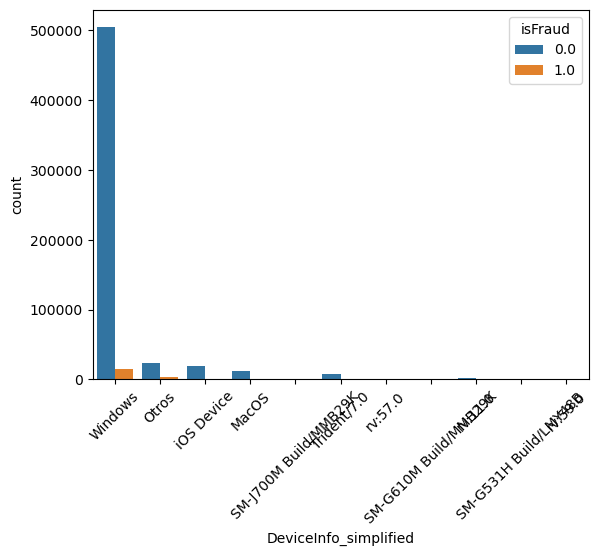

In [ ]:
top_n = 10
var=top_cat[0]
top_values = df_train_new[var].value_counts().nlargest(top_n).index
df_train_new[f'{var}_simplified'] = df_train_new[var].apply(lambda x: x if x in top_values else 'Otros')

sns.countplot(data=df_train_new, x=f'{var}_simplified', hue='isFraud')
plt.xticks(rotation=45)

**1. DeviceInfo_simplified:** que representa el tipo o marca del dispositivo desde el cual se realiza la transacción, muestra una alta concentración de transacciones legítimas (isFraud = 0) provenientes de equipos con sistema operativo Windows. Sin embargo, se observa que el fraude (isFraud = 1) está relativamente más distribuido entre otros dispositivos, incluidos iOS Device, Otros, y algunos modelos específicos de Samsung. Esto sugiere que los dispositivos menos comunes o móviles podrían estar asociados con un mayor riesgo de fraude, posiblemente por el uso de entornos menos controlados o más propensos a accesos no autorizados.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'chrome 63.0'),
  Text(1, 0, 'Otros'),
  Text(2, 0, 'mobile safari 11.0'),
  Text(3, 0, 'chrome 62.0'),
  Text(4, 0, 'mobile safari generic'),
  Text(5, 0, 'safari generic'),
  Text(6, 0, 'ie 11.0 for desktop'),
  Text(7, 0, 'chrome generic'),
  Text(8, 0, 'chrome 63.0 for android'),
  Text(9, 0, 'chrome 64.0'),
  Text(10, 0, 'chrome 65.0')])

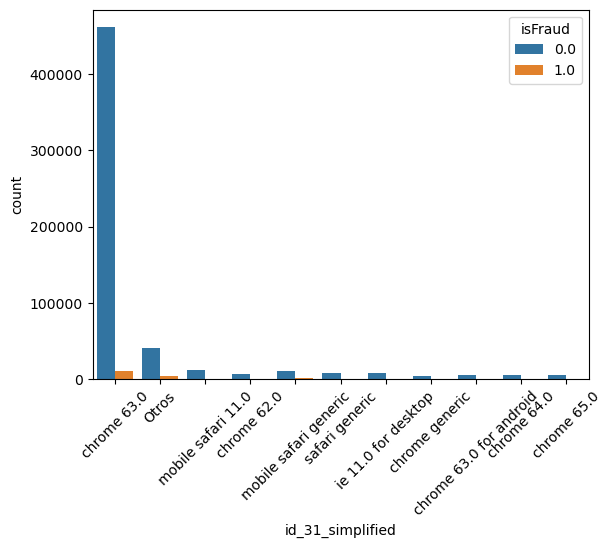

In [ ]:
top_n = 10
var=top_cat[1]
top_values = df_train_new[var].value_counts().nlargest(top_n).index
df_train_new[f'{var}_simplified'] = df_train_new[var].apply(lambda x: x if x in top_values else 'Otros')

sns.countplot(data=df_train_new, x=f'{var}_simplified', hue='isFraud')
plt.xticks(rotation=45)

**2. id_31_simplified:** Esta variable parece asociada al navegador o agente de usuario (user agent) que accede a la plataforma. El navegador chrome 63.0 es el más utilizado tanto por transacciones legítimas como por fraudulentas, pero en las demás categorías se evidencia una mayor proporción relativa de fraude. Navegadores como mobile safari, safari generic o chrome generic presentan una distribución más equilibrada entre ambas clases, lo que sugiere que algunos navegadores menos convencionales o móviles podrían ser más vulnerables o empleados en actividades sospechosas.

([0, 1], [Text(0, 0, 'T'), Text(1, 0, 'F')])

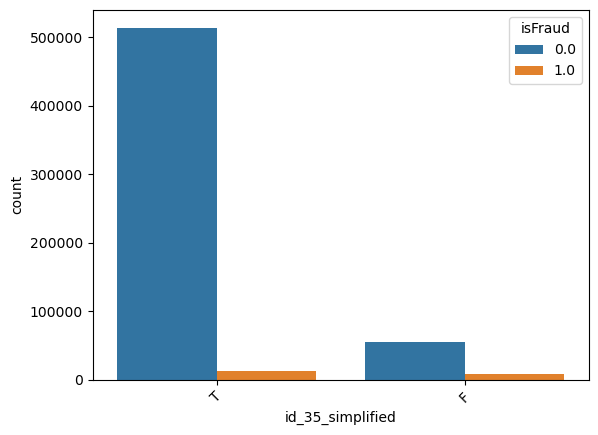

In [ ]:
top_n = 10
var=top_cat[2]
top_values = df_train_new[var].value_counts().nlargest(top_n).index
df_train_new[f'{var}_simplified'] = df_train_new[var].apply(lambda x: x if x in top_values else 'Otros')

sns.countplot(data=df_train_new, x=f'{var}_simplified', hue='isFraud')
plt.xticks(rotation=45)

**3. id_35_simplified:** parece ser binaria y relacionada con un atributo booleano del entorno del usuario (como cookies habilitadas, validación de firma, etc.). Aunque la mayoría de las transacciones (fraudulentas y no fraudulentas) se concentran en una única categoría, se observa que la otra categoría presenta una proporción de fraude ligeramente más elevada. Esto podría indicar que ciertas configuraciones del navegador o del sistema, cuando están deshabilitadas o modificadas, incrementan el riesgo de que la transacción sea fraudulenta.

([0, 1], [Text(0, 0, 'desktop'), Text(1, 0, 'mobile')])

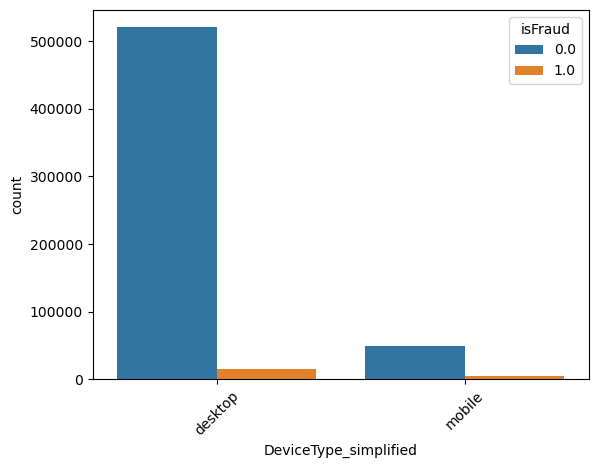

In [ ]:
top_n = 10
var=top_cat[3]
top_values = df_train_new[var].value_counts().nlargest(top_n).index
df_train_new[f'{var}_simplified'] = df_train_new[var].apply(lambda x: x if x in top_values else 'Otros')

sns.countplot(data=df_train_new, x=f'{var}_simplified', hue='isFraud')
plt.xticks(rotation=45)

**4. DeviceType_simplified:** Esta variable distingue entre usuarios que realizan transacciones desde desktop o mobile. Los dispositivos de escritorio (desktop) concentran la mayor parte de las transacciones, tanto legítimas como fraudulentas. Sin embargo, se puede notar que los dispositivos móviles presentan una mayor proporción relativa de fraude, lo que podría reflejar un patrón de comportamiento de fraude móvil o una menor seguridad en dispositivos móviles.

([0, 1, 2, 3],
 [Text(0, 0, 'credit'),
  Text(1, 0, 'debit'),
  Text(2, 0, 'debit or credit'),
  Text(3, 0, 'charge card')])

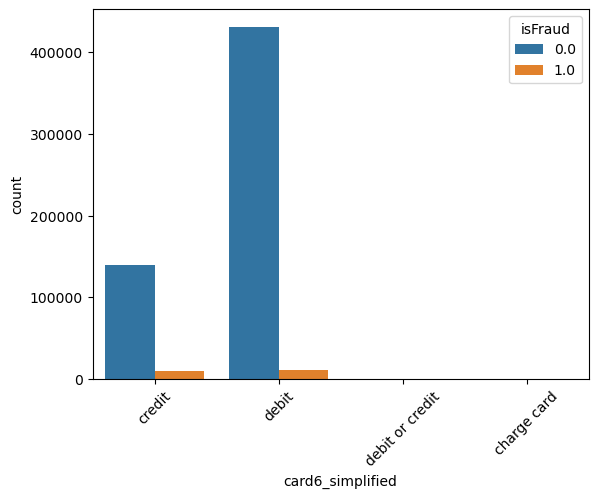

In [ ]:
top_n = 10
var=top_cat[4]
top_values = df_train_new[var].value_counts().nlargest(top_n).index
df_train_new[f'{var}_simplified'] = df_train_new[var].apply(lambda x: x if x in top_values else 'Otros')

sns.countplot(data=df_train_new, x=f'{var}_simplified', hue='isFraud')
plt.xticks(rotation=45)

**5. card6_simplified:** indica el tipo de tarjeta utilizada: credit, debit, charge card, entre otras. Las tarjetas de débito dominan en términos de volumen de transacciones, pero también muestran una mayor proporción de fraude que las de crédito. Esto puede deberse a que las tarjetas de débito, al estar conectadas directamente a cuentas bancarias, suelen ser más atractivas para los atacantes, o bien pueden estar más expuestas en ciertos contextos de pago en línea.

En Conclusión: Estas cinco variables categóricas revelan patrones importantes para la detección de fraude, especialmente en aspectos relacionados con el dispositivo, el navegador, y el tipo de tarjeta. Si bien muchas transacciones fraudulentas ocurren en los grupos más frecuentes (como Windows o chrome 63.0), las diferencias relativas en las categorías menos comunes pueden ser especialmente útiles para los modelos predictivos. Por lo tanto, es recomendable mantener estas variables en etapas posteriores del modelado, realizando codificaciones adecuadas (como One-Hot o Target Encoding) para aprovechar su capacidad discriminativa.



In [ ]:
# Obtener nombres de variables con importancia ≈ 0
variables_importancia_cero = importancia_df[importancia_df['Importancia'] == 0.0]['Variable'].tolist()

# Eliminar esas columnas del DataFrame original
df_train_new = df_train_new.drop(columns=variables_importancia_cero)

# Confirmar resultado
print(f"Se eliminaron {len(variables_importancia_cero)} variables con importancia 0.")
print(f"Nuevo tamaño del dataset: {df_train_new.shape}")


Se eliminaron 4 variables con importancia 0.
Nuevo tamaño del dataset: (590540, 251)


Estas variables se eliminaron del dataset antes del entrenamiento del modelo para: reducir ruido, acelerar procesamiento y evitar sobreajuste.

## Analisis de Simetría

In [ ]:
# Simetría
skewness = df_train_new.select_dtypes(include='number').drop(columns='isFraud').skew()
skewness.sort_values(ascending=False)


V334     450.479323
V206     427.150989
V305     384.230074
V269     378.180731
V311     323.834650
            ...    
V14      -47.904416
V107     -48.767019
id_10    -54.654434
V65      -58.399860
V1      -186.372808
Length: 229, dtype: float64

In [ ]:
top_skewed = skewness.abs().sort_values(ascending=False).head(5).index.tolist()
top_skewed

['V334', 'V206', 'V305', 'V269', 'V311']

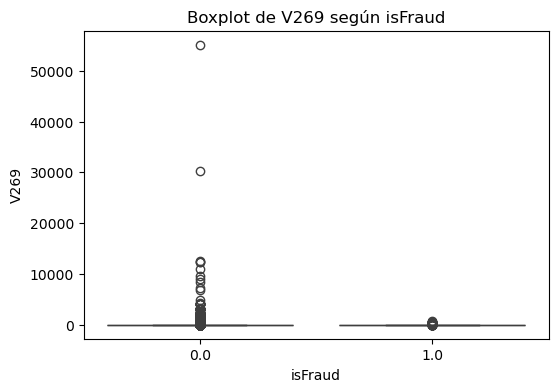

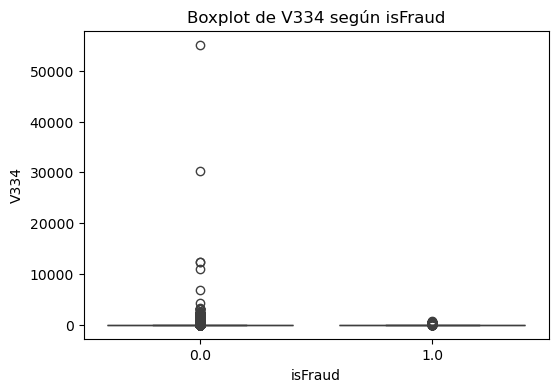

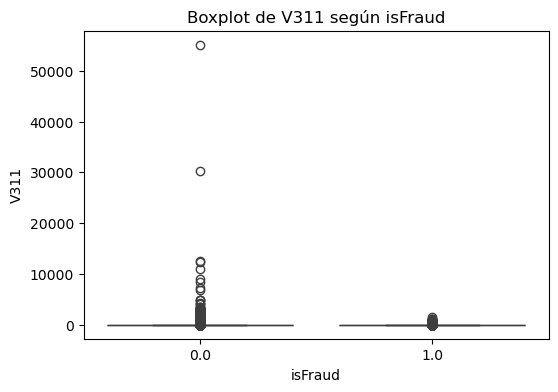

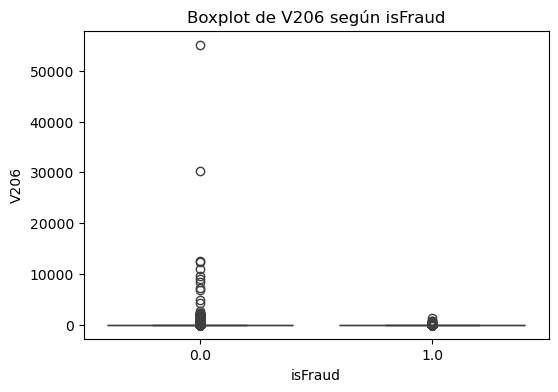

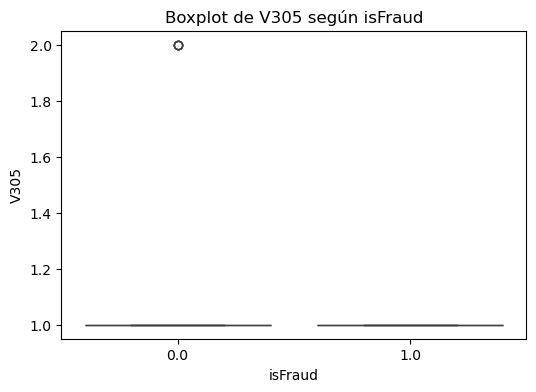

In [ ]:
#grafico
variables_a_graficar = list(set(top_skewed))
for var in variables_a_graficar:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train_new, x='isFraud', y=var)
    plt.title(f'Boxplot de {var} según isFraud')
    plt.xlabel('isFraud')
    plt.ylabel(var)
    plt.show()

**Análisis de Simetría (Skewness)**

Se evaluó el grado de asimetría de las variables numéricas mediante el coeficiente de skewness, el cual permite identificar si una variable presenta una distribución simétrica (skewness ≈ 0), sesgada a la derecha (skewness > 0) o sesgada a la izquierda (skewness < 0). En este caso, se identificaron las siguientes 5 variables como las más asimétricas:

**1. V334 (Skewness ≈ 450.48):** Esta variable presenta una asimetría extremadamente pronunciada hacia la derecha. En el boxplot se observa una gran concentración de valores en la parte baja del eje y una larga cola de valores atípicos en el extremo superior. Esto indica la presencia de muchos valores pequeños o iguales, con pocos valores muy grandes que distorsionan la distribución.

**2. V206 (Skewness ≈ 427.15):** Similar a V334, esta variable muestra una gran cantidad de valores bajos con outliers muy elevados. El patrón sugiere que la mayoría de las observaciones están agrupadas cerca del mínimo, lo que podría estar afectando negativamente el rendimiento de algoritmos sensibles a la escala o distribución de los datos.

**3. V305 (Skewness ≈ 384.23):** Aunque la magnitud de la skewness es elevada, el boxplot indica que la mayoría de los valores se mantienen constantes (valor 1), con apenas uno o dos valores atípicos. Esto podría indicar una variable casi constante, que debería ser analizada también por su varianza, ya que podría no aportar valor al modelo.

**4. V269 (Skewness ≈ 378.18):** La distribución de esta variable está fuertemente sesgada hacia valores bajos, con algunos outliers extremadamente altos que incrementan el coeficiente de asimetría. Esta característica puede tener un impacto significativo sobre modelos de regresión o distancia (KNN, SVM), donde se asume cierta distribución normal.

**5. V311 (Skewness ≈ 323.83):** Presenta un comportamiento similar a las anteriores, con una gran cantidad de valores cercanos a cero y unos pocos valores excepcionalmente altos que distorsionan la forma de la distribución.

In [ ]:
df_train_new['V305'].var()

6.773427167608211e-06

In [ ]:
df_train_new['V305'].value_counts(normalize=True)

V305
1.0    0.999993
2.0    0.000007
Name: proportion, dtype: float64

## Analisis de datos atipicos

In [ ]:
outliers_summary = []

for col in df_train_new.select_dtypes(include='number').drop(columns='isFraud').columns:
    Q1 = df_train_new[col].quantile(0.25)
    Q3 = df_train_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_train_new[(df_train_new[col] < lower) | (df_train_new[col] > upper)]
    outliers_summary.append((col, len(outliers), round(100 * len(outliers) / len(df_train_new), 2)))

outliers_df = pd.DataFrame(outliers_summary, columns=['Variable', 'N° Outliers', '% Outliers'])
outliers_df.sort_values(by='% Outliers', ascending=False)

# Outliers
top_outliers = outliers_df.sort_values(by='% Outliers', ascending=False).head(5)['Variable'].tolist()
top_outliers

['D5', 'D2', 'dist1', 'D3', 'V11']

In [ ]:
outliers_df.sort_values(by='% Outliers', ascending=False)

,Variable,N° Outliers,% Outliers
19,D5,276569,46.83
16,D2,248677,42.11
8,dist1,230538,39.04
17,D3,182515,30.91
39,V11,141620,23.98
...,...,...,...
201,V305,4,0.00
5,card5,0,0.00
3,card2,0,0.00
2,card1,0,0.00


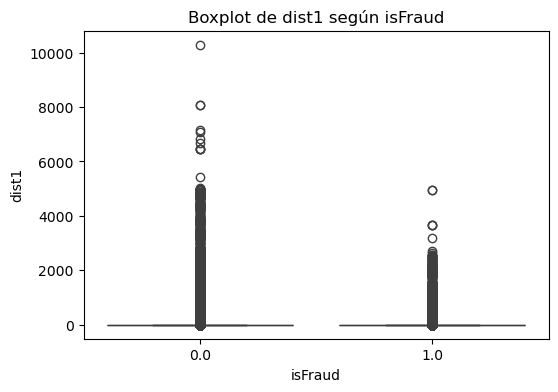

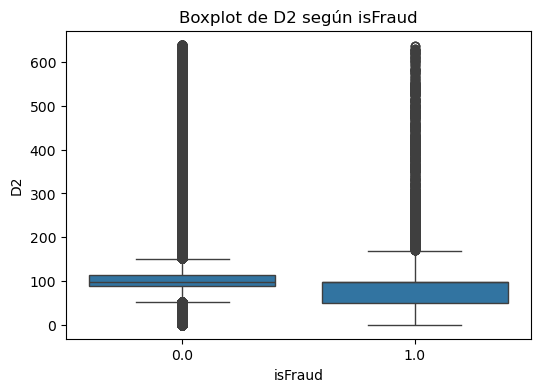

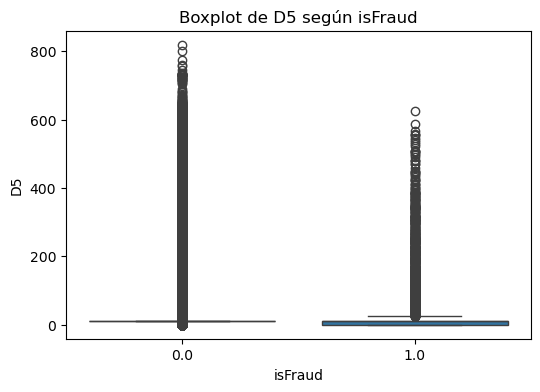

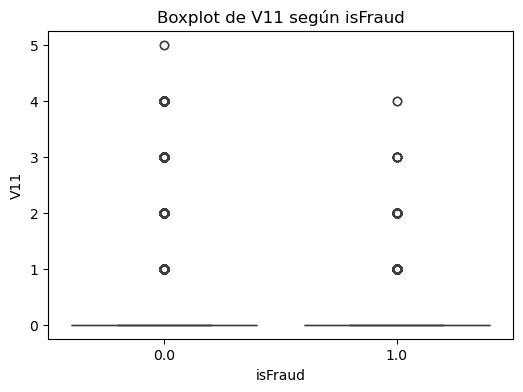

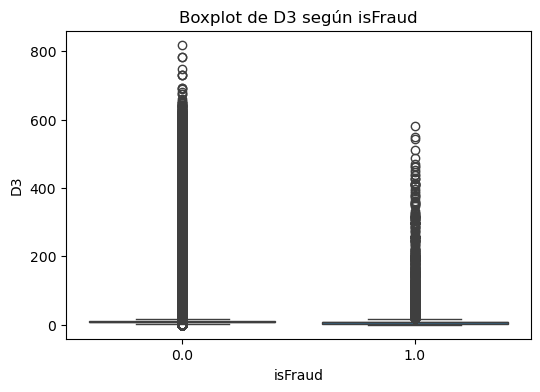

In [ ]:
#grafico
variables_a_graficar = list(set(top_outliers))
for var in variables_a_graficar:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train_new, x='isFraud', y=var)
    plt.title(f'Boxplot de {var} según isFraud')
    plt.xlabel('isFraud')
    plt.ylabel(var)
    plt.show()

Interpretación variable por variable
1. D5
Esta variable presenta un altísimo porcentaje de outliers (casi el 47%). El boxplot revela que una gran cantidad de transacciones legítimas tienen valores muy elevados, mientras que las fraudulentas tienden a estar en un rango más bajo. Esto podría significar que los valores extremos en D5 están más asociados a comportamiento legítimo, por lo que eliminar directamente estos outliers podría ser riesgoso, ya que representan una parte natural del comportamiento normal.

Recomendación: Transformación (logarítmica o winsorización), no eliminación directa.

2. D2
Con más del 42% de valores fuera del rango intercuartílico, D2 también muestra una alta presencia de outliers. Sin embargo, el boxplot sugiere que los valores extremos pueden tener una distribución diferenciada entre clases (isFraud), lo que podría ser información útil para el modelo.

Recomendación: Aplicar una transformación de escala (como log1p) o analizar si los outliers corresponden a una subpoblación relevante.

3. dist1
Casi el 40% de los valores son outliers. Esta variable parece relacionada con la distancia entre ubicaciones (por ejemplo, dirección de facturación y dirección de envío). En este caso, los valores extremos podrían reflejar riesgo real (por ejemplo, envíos desde regiones remotas o cambios inusuales de dirección).

Recomendación: No eliminar los outliers, sino mantenerlos y transformarlos si es necesario. También se puede usar como variable binaria: "¿hay distancia? sí/no".

4. D3
Al igual que las anteriores, D3 tiene un 30% de valores atípicos. El boxplot muestra un rango estrecho de valores normales y una gran dispersión de valores elevados. Es posible que esta variable refleje tiempos de inactividad o latencias que, en valores extremos, se asocian con fraude.

Recomendación: Aplicar transformación logarítmica, y si fuera necesario, crear una variable indicadora para marcar valores extremos.

5. V11
Aunque el porcentaje de outliers es menor (24%), los boxplots muestran una concentración clara de valores bajos (posiblemente todos iguales) con algunos valores aislados que se comportan como outliers. Dado que esta variable parece tener poca variabilidad salvo por algunos valores, podría evaluarse también por su importancia predictiva o varianza.

Recomendación: Si los outliers se asocian con fraude, mantenerlos. Si no aportan valor, considerar eliminar la variable.

## Analisis de Dispersión

In [ ]:
dispersion_df = df_train_new.select_dtypes(include='number').drop(columns='isFraud').agg(['std', 'var']).T
dispersion_df.columns = ['Desviación estándar', 'Varianza']
dispersion_df.sort_values(by='Desviación estándar', ascending=False)

top_dispersion = dispersion_df.sort_values(by='Desviación estándar', ascending=False).head(5).index.tolist()
top_dispersion

['TransactionDT', 'id_02', 'V160', 'card1', 'V164']

In [ ]:
dispersion_df.sort_values(by='Desviación estándar', ascending=False)


,Desviación estándar,Varianza
TransactionDT,4.617224e+06,2.131875e+13
id_02,8.071476e+04,6.514873e+09
V160,5.541040e+04,3.070313e+09
card1,4.901170e+03,2.402147e+07
V164,2.273784e+03,5.170095e+06
...,...,...
V41,2.283168e-02,5.212854e-04
V14,2.085680e-02,4.350062e-04
V107,2.048851e-02,4.197790e-04
V65,1.711335e-02,2.928669e-04


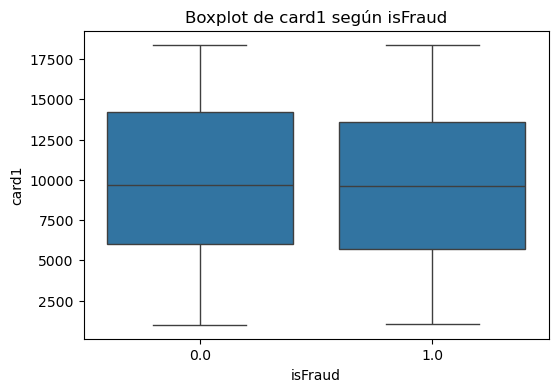

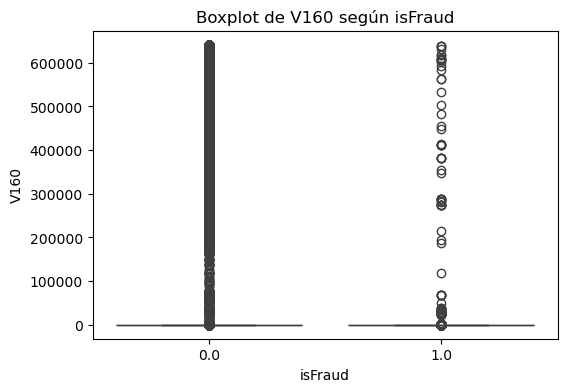

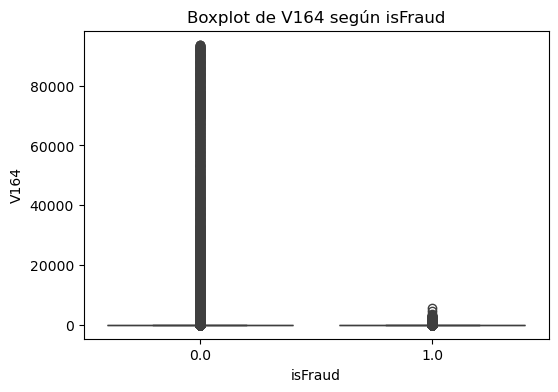

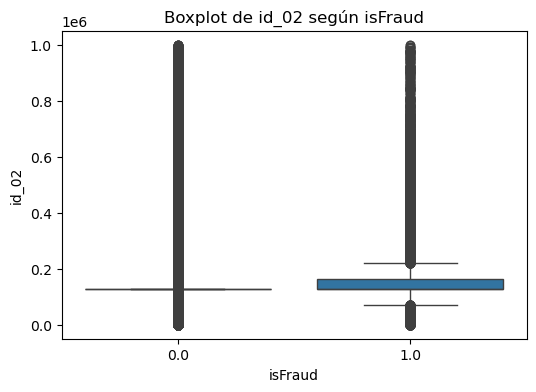

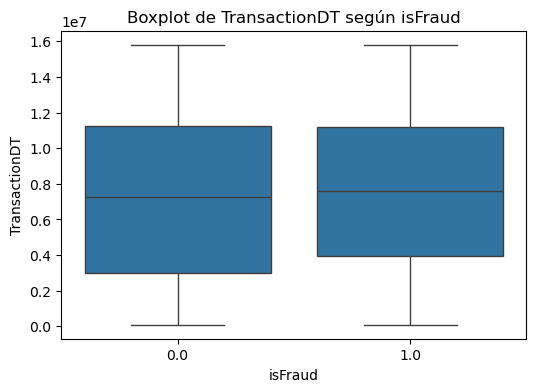

In [ ]:
#grafico
variables_a_graficar = list(set(top_dispersion))
for var in variables_a_graficar:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train_new, x='isFraud', y=var)
    plt.title(f'Boxplot de {var} según isFraud')
    plt.xlabel('isFraud')
    plt.ylabel(var)
    plt.show()

1. TransactionDT
Desviación estándar: 4,617,224

Varianza: 2.13 × 10¹³

Interpretación: Esta variable representa el timestamp de la transacción. Su alta dispersión es completamente esperada y lógica, ya que representa una variable acumulativa en el tiempo. El boxplot muestra una distribución uniforme entre las clases (isFraud = 0 y 1), lo cual es típico en variables temporales.

Recomendación:
✔️ Mantener.
🛠️ Puedes considerar transformarla en variables derivadas más útiles: día, hora, semana, etc. (TransactionDT → TransactionHour, TransactionDay).

2. id_02
Desviación estándar: 80,714

Varianza: 6.5 × 10⁹

Interpretación: Esta variable presenta una dispersión alta y una gran cantidad de valores extremos (confirmado por el boxplot). Sin embargo, se observa un patrón interesante: las transacciones fraudulentas tienden a concentrarse en un rango más reducido, lo que puede ser útil para discriminación.

Recomendación:
✔️ Mantener.
🔄 Aplicar una transformación logarítmica o StandardScaler para normalizar.

3. V160
Desviación estándar: 55,410

Varianza: 3.07 × 10⁹

Interpretación: Muestra una dispersión significativa y outliers muy marcados, especialmente en la clase isFraud = 1, lo cual podría ser un patrón útil. Esta variable tiene potencial discriminativo y su comportamiento no debe ignorarse.

Recomendación:
✔️ Mantener.
🔄 Aplicar log1p o estandarización.
📌 Opción interesante para modelos de árboles, pero escalar si se usa regresión o KNN.

4. card1
Desviación estándar: 4,901

Varianza: 2.4 × 10⁷

Interpretación: Aunque su varianza es alta, el boxplot indica una distribución bastante balanceada y simétrica entre las clases. Esto sugiere que es una variable numérica estable (como un ID de cliente anonimizador), con una utilidad potencial en la identificación de patrones individuales.

Recomendación:
✔️ Mantener.
📌 No escalarla como variable continua si representa un identificador. En su lugar, puede considerarse frecuencia encoding o binarización (Top N cards).

5. V164
Desviación estándar: 2,274

Varianza: 5.17 × 10⁶

Interpretación: Aunque su dispersión es la menor del grupo, sigue siendo significativa. Los boxplots indican mayor densidad de valores bajos y algunos outliers en la clase isFraud, lo que podría aportar cierta utilidad.

Recomendación:
✔️ Mantener.
🔄 Aplicar una transformación moderada (raíz cuadrada, log1p) para reducir el impacto de valores extremos.

## Variables casi constantes

In [ ]:
# Parámetros de corte
umbral_varianza = 0.0001
umbral_frecuencia = 0.99

# Variables numéricas del dataset
num_cols = df_train_new.select_dtypes(include='number').columns.tolist()

# Detectar variables casi constantes
variables_casi_constantes = []

for col in num_cols:
    varianza = df_train_new[col].var()
    frec_max = df_train_new[col].value_counts(normalize=True).values[0]  # proporción del valor más común
    if varianza < umbral_varianza and frec_max > umbral_frecuencia:
        variables_casi_constantes.append(col)

# Mostrar variables detectadas
print("Variables detectadas como casi constantes:")
print(variables_casi_constantes)

Variables detectadas como casi constantes:
['V1', 'V305']


In [ ]:
# Eliminar del dataset
df_train_new.drop(columns=variables_casi_constantes, inplace=True)
print(f"\nSe eliminaron {len(variables_casi_constantes)} variables. Nuevo shape: {df_train_new.shape}")


Se eliminaron 2 variables. Nuevo shape: (590540, 252)


In [ ]:


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# train_transaction = pd.read_csv('train_transaction.csv')
df_train_new = pd.read_csv('df_train_new.csv')
df_train_new.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_35,id_36,id_37,DeviceType,DeviceInfo,id_31_simplified,DeviceInfo_simplified,id_35_simplified,DeviceType_simplified,card6_simplified
0,0.0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,19.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,credit
1,0.0,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,8.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,credit
2,0.0,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,287.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,debit
3,0.0,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,8.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,debit
4,0.0,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,8.0,...,T,F,T,mobile,SAMSUNG SM-G892A Build/NRD90M,Otros,Otros,T,mobile,credit


In [ ]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 252 entries, isFraud to card6_simplified
dtypes: float64(228), object(24)
memory usage: 1.1+ GB


## Analisis bivariado

4 pares de variables explicativas:

Tomando en cuenta lo analizado (dispersión, importancia, y outliers), se deciden seleccionar los siguientes pares de variables explicativas para realizar el analisis bivariado:

- V160 vs id_02 → ambas con alta varianza y potencial relevancia para fraude.
- V164 vs D2 → ambas variables dispersas, con valores extremos interesantes.
- card1 vs D5 → puede mostrar agrupamientos por cliente y diferencias en comportamiento temporal.
- dist1 vs D3 → relación entre distancias de dirección y tiempo desde la última transacción.



C:\Users\kelly\.conda\envs\sklearn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


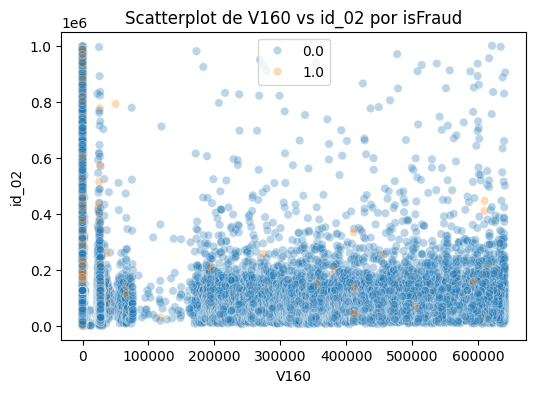

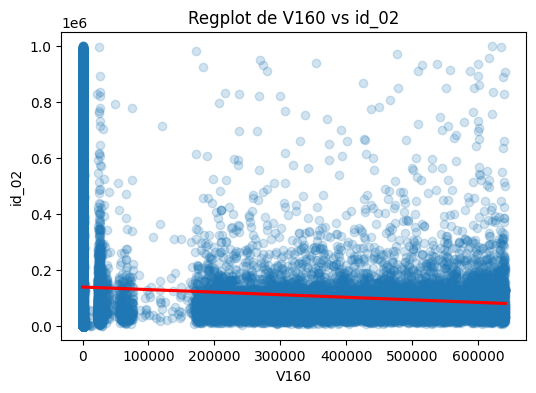

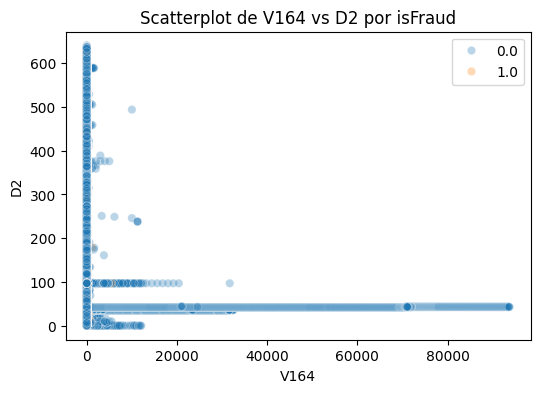

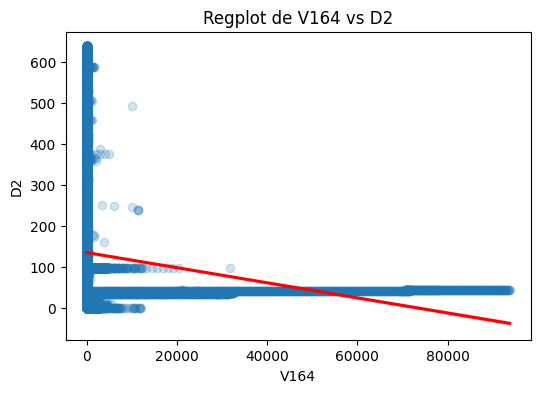

C:\Users\kelly\.conda\envs\sklearn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


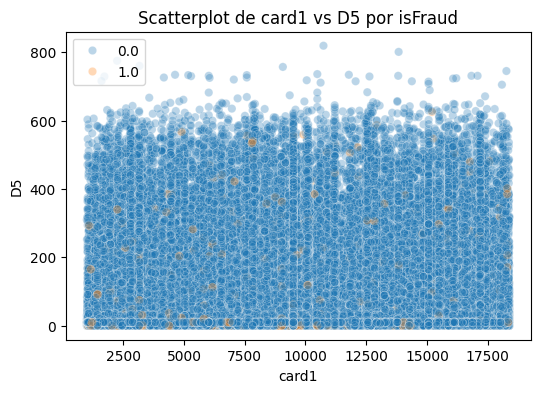

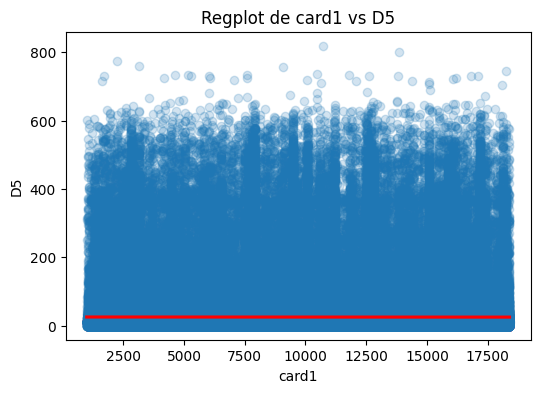

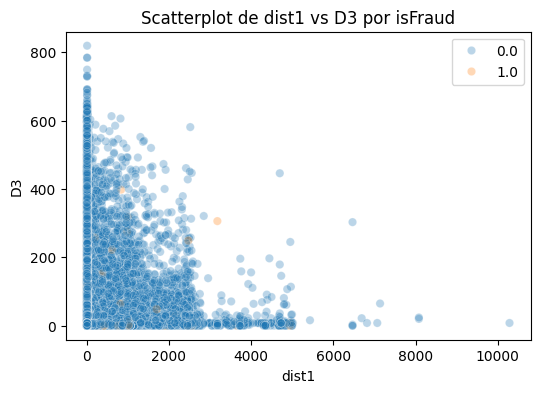

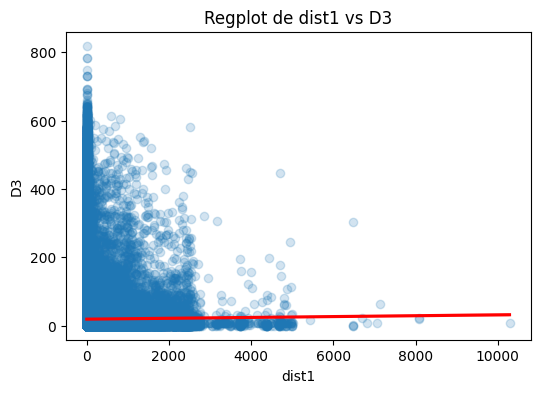

In [ ]:
pares = [
    ('V160', 'id_02'),
    ('V164', 'D2'),
    ('card1', 'D5'),
    ('dist1', 'D3')
]

# Scatterplot y Regplot para cada par
for x_var, y_var in pares:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train_new, x=x_var, y=y_var, hue='isFraud', alpha=0.3)
    plt.title(f'Scatterplot de {x_var} vs {y_var} por isFraud')
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.regplot(data=df_train_new, x=x_var, y=y_var, scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
    plt.title(f'Regplot de {x_var} vs {y_var}')
    plt.show()


In [ ]:
import seaborn as sns


Análisis Bivariado: V160 vs id_02
📈 Scatterplot con isFraud
Se observa una alta concentración de puntos en valores bajos de V160, especialmente cercanos al eje vertical (valores de V160 cercanos a 0), con una dispersión amplia de id_02.

Las observaciones etiquetadas como fraude (isFraud = 1, en naranja) están mayoritariamente concentradas en la zona de menor V160 y menor id_02, aunque también hay algunas dispersas hacia valores altos de id_02.

No hay una separación clara entre clases, pero sí se nota que los fraudes tienden a concentrarse en una región más compacta del gráfico, lo cual sugiere que el patrón conjunto de bajos valores en ambas variables podría tener relevancia.

📊 Regplot
La línea de regresión es prácticamente horizontal o ligeramente descendente, indicando que no hay una relación lineal fuerte entre V160 e id_02.

Sin embargo, el alto nivel de dispersión vertical y los outliers extremos podrían estar afectando esta pendiente.

Esto sugiere que aunque la relación lineal no es fuerte, puede existir una interacción relevante desde el punto de vista no lineal o en términos de densidad localizada (zonas de alta frecuencia de fraude).

Análisis Bivariado: V164 vs D2
📈 Scatterplot con isFraud
El gráfico muestra una alta concentración de puntos en los valores bajos de ambas variables, especialmente cuando V164 < 20,000 y D2 < 150.

La mayoría de los puntos con isFraud = 1 (fraude) están localizados en la parte inferior izquierda, con baja dispersión en ambas variables, lo que sugiere un patrón particular de comportamiento de fraude en ese rango.

Hay valores extremos en V164, pero casi todos están asociados con isFraud = 0 (transacciones legítimas), lo que podría ser útil para distinguir entre clases.

📊 Regplot
La línea de regresión muestra una pendiente negativa clara, indicando que a medida que V164 aumenta, D2 tiende a disminuir.

Esto sugiere una relación lineal inversa, aunque débil, entre ambas variables. Puede reflejar que transacciones con ciertos valores altos en V164 tienden a presentar menos actividad reciente en D2 (por ejemplo, menor cantidad de días desde una transacción anterior).

Análisis Bivariado: card1 vs D5
📈 Scatterplot con isFraud
La variable card1 representa un identificador anónimo del titular de la tarjeta, mientras que D5 está relacionada con una medida temporal (como días desde el último evento).

En el scatterplot se evidencia una distribución uniforme y densa, con puntos dispersos de isFraud = 1 (fraude) a lo largo de todo el rango de card1.

No se observan agrupamientos definidos por clase. Los fraudes están esparcidos, y la relación entre card1 y D5 no parece tener estructura visual evidente.

📊 Regplot
La línea de regresión es casi completamente horizontal, lo que indica que no existe una relación lineal significativa entre estas dos variables.

Dado que card1 es más bien una variable identificadora o categórica codificada numéricamente, no se espera que tenga relación directa con una variable continua como D5.



 Análisis Bivariado: dist1 vs D3
📈 Scatterplot con isFraud
Se observa una alta concentración de puntos en la esquina inferior izquierda del gráfico, donde tanto dist1 como D3 tienen valores bajos.

Las observaciones fraudulentas (isFraud = 1) también se ubican mayoritariamente en esa zona, lo que sugiere que transacciones con poca distancia entre direcciones (dist1) y pocos días desde la última transacción (D3) podrían tener mayor riesgo.

A medida que dist1 aumenta, la dispersión de D3 disminuye, mostrando un patrón triangular hacia la derecha.

📊 Regplot
La línea de regresión muestra una pendiente negativa poco pronunciada, lo que indica una relación inversa débil entre ambas variables: cuando dist1 es mayor, tiende a haber menor D3.

Aunque no hay una relación fuerte, la forma del gráfico sugiere que la información conjunta de estos valores bajos puede ser útil para modelar comportamientos sospechosos o atípicos.

In [ ]:
# Seleccionar columnas categóricas
cat_cols = df_train_new.select_dtypes(include='object').columns

# Contar número de categorías únicas por variable
cat_summary = df_train_new[cat_cols].nunique().sort_values(ascending=False)

# Mostrar resumen
print("Número de categorías por variable categórica:")
print(cat_summary)

# Si quieres como DataFrame para análisis posterior
cat_summary_df = cat_summary.reset_index()
cat_summary_df.columns = ['Variable', 'N° Categorías']


Número de categorías por variable categórica:
DeviceInfo               1786
id_33                     260
id_31                     130
id_30                      75
R_emaildomain              60
P_emaildomain              59
DeviceInfo_simplified      11
id_31_simplified           11
id_34                       4
card6                       4
card4                       4
card6_simplified            4
id_15                       3
id_29                       2
id_28                       2
id_16                       2
id_35                       2
id_36                       2
id_37                       2
DeviceType                  2
id_12                       2
M1                          2
id_35_simplified            2
DeviceType_simplified       2
dtype: int64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder, FrequencyEncoder

preprocessor = ColumnTransformer([
    # Grupo 1 y 2 - Alta y Moderada cardinalidad →  Frequency Encoding
    ('freq', FrequencyEncoder(), ['DeviceInfo', 'id_33', 'id_31', 'id_30', 'R_emaildomain', 'P_emaildomain', 'DeviceInfo_simplified', 'id_31_simplified']),

    # Grupo 3 - Baja → One-Hot
    ('ohe_low', OneHotEncoder(handle_unknown='ignore'), [
        'id_34', 'card6', 'card4', 'card6_simplified', 'id_15', 'id_29', 'id_28', 'id_16',
        'id_35', 'id_36', 'id_37', 'DeviceType', 'id_12', 'M1', 'id_35_simplified', 'DeviceType_simplified'
    ])
])


ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.count import CountEncoder


In [ ]:

# Definición de grupos
cat_high_mod = ['DeviceInfo', 'id_33', 'id_31', 'id_30', 'R_emaildomain', 'P_emaildomain',
                'DeviceInfo_simplified', 'id_31_simplified']
cat_low = ['id_34', 'card6', 'card4', 'card6_simplified', 'id_15', 'id_29', 'id_28', 'id_16',
           'id_35', 'id_36', 'id_37', 'DeviceType', 'id_12', 'M1', 'id_35_simplified', 'DeviceType_simplified']

num_cols = df_train_new.select_dtypes(include=['int64', 'float64']).drop(columns=['isFraud']).columns.tolist()

preprocessor = ColumnTransformer([
    ('freq', CountEncoder(normalize=True), cat_high_mod),
    ('ohe_low', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_low),
    ('scaler', StandardScaler(), num_cols)
])


# **Modelos de Clasificación**

## Preprocesamiento

Dado el tamaño considerable del conjunto de entrenamiento original, que contenía más de 590,000 registros, se optó por utilizar una muestra estratificada de 150,000 transacciones con el fin de optimizar el tiempo de cómputo durante la fase de entrenamiento de los modelos. Esta decisión permitió mantener la eficiencia en el proceso de validación cruzada y búsqueda de hiperparámetros, sin comprometer la representatividad de los datos.

In [ ]:
# Crear muestra estratificada de 150,000 registros desde df_train_new
df_sample_150k, _ = train_test_split(
    df_train_new,
    train_size=150000,
    stratify=df_train_new['isFraud'],
    random_state=42
)

# Separar variables predictoras y objetivo
X_sample_150k = df_sample_150k.drop(columns=['isFraud'])
y_sample_150k = df_sample_150k['isFraud']

# Confirmar distribución
distribucion = y_sample_150k.value_counts(normalize=True)
len_muestra = len(df_sample_150k)

X = X_sample_150k
y = y_sample_150k

distribucion, len_muestra


(isFraud
 0.0    0.965007
 1.0    0.034993
 Name: proportion, dtype: float64,
 150000)

La muestra fue generada utilizando la técnica de muestreo estratificado basada en la variable objetivo isFraud, asegurando que la proporción de transacciones fraudulentas y no fraudulentas en la muestra se conservara de forma similar a la distribución del conjunto original. Esto garantiza que los modelos entrenados sobre esta muestra puedan aprender patrones consistentes y representativos del comportamiento real del problema.

Además, se estableció una semilla aleatoria (random_state=42) para asegurar la reproducibilidad de los resultados. De esta forma, se preservó la integridad estadística del conjunto de entrenamiento mientras se reducían significativamente los tiempos de ejecución y carga computacional del pipeline de modelado.

In [ ]:
X

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_35,id_36,id_37,DeviceType,DeviceInfo,id_31_simplified,DeviceInfo_simplified,id_35_simplified,DeviceType_simplified,card6_simplified
169524,3635485.0,30.950,7508.0,321.0,150.0,226.0,220.0,87.0,2.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,debit
562164,14899778.0,161.000,8468.0,111.0,150.0,219.0,272.0,87.0,5.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,credit
157884,3284432.0,13.992,9633.0,296.0,185.0,138.0,299.0,87.0,8.0,37.0,...,F,F,F,mobile,Windows,mobile safari 11.0,Windows,F,mobile,debit
42485,1027698.0,50.000,7482.0,490.0,150.0,226.0,299.0,87.0,8.0,37.0,...,T,F,F,desktop,Windows,Otros,Windows,T,desktop,debit
191589,4302161.0,557.100,16988.0,346.0,150.0,203.0,310.0,87.0,17.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10767,326882.0,88.000,13249.0,111.0,150.0,226.0,264.0,87.0,6.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,debit
342767,8452446.0,28.277,14276.0,177.0,185.0,137.0,284.0,60.0,8.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,credit
324259,8019613.0,59.000,10493.0,455.0,150.0,126.0,123.0,87.0,8.0,37.0,...,T,F,T,desktop,Windows,chrome 63.0,Windows,T,desktop,debit
451381,11512046.0,15.800,8404.0,156.0,146.0,226.0,299.0,87.0,8.0,37.0,...,F,F,T,mobile,Hisense L675 Build/MRA58K,Otros,Otros,F,mobile,credit


In [ ]:
# --- Separar variables ---
cat_high_mod = ['DeviceInfo', 'id_33', 'id_31', 'id_30', 'R_emaildomain', 'P_emaildomain',
                'DeviceInfo_simplified', 'id_31_simplified']
cat_low = ['id_34', 'card6', 'card4', 'card6_simplified', 'id_15', 'id_29', 'id_28', 'id_16',
           'id_35', 'id_36', 'id_37', 'DeviceType', 'id_12', 'M1', 'id_35_simplified', 'DeviceType_simplified']
num_cols = df_sample_150k.select_dtypes(include=['int64', 'float64']).drop(columns=['isFraud']).columns.tolist()

# --- Preprocesador ---
preprocessor = ColumnTransformer([
    ('freq', CountEncoder(normalize=True), cat_high_mod),
    ('ohe_low', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_low),
    ('scaler', StandardScaler(), num_cols)
])


In [ ]:
# Función para guardar modelo y métricas finales
def guardar_modelo_y_metricas(nombre_modelo, modelo_entrenado, X, y, archivo_metricas='metricas_modelos.csv'):
    archivo_modelo = f'modelo_{nombre_modelo.replace(" ", "_").lower()}.pkl'
    joblib.dump(modelo_entrenado, archivo_modelo)
    print(f"✅ Modelo guardado en: {archivo_modelo}")

    y_pred = modelo_entrenado.predict(X)
    y_proba = modelo_entrenado.predict_proba(X)[:, 1]

    metricas = {
        'Modelo': nombre_modelo,
        'AUC (Train)': roc_auc_score(y, y_proba),
        'F1 (Train)': f1_score(y, y_pred),
        'Precision (Train)': precision_score(y, y_pred),
        'Recall (Train)': recall_score(y, y_pred)
    }

    try:
        df_metricas = pd.read_csv(archivo_metricas)
    except FileNotFoundError:
        df_metricas = pd.DataFrame()

    df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas])], ignore_index=True)
    df_metricas.to_csv(archivo_metricas, index=False)
    print("📊 Métricas guardadas en:", archivo_metricas)
    return df_metricas.tail(1)


## Logistic Regression

In [ ]:

# --- Pipeline ---
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))
])

# --- Espacio de búsqueda ---
search_space = {
    'classifier__C': (1e-4, 10.0, 'log-uniform'),
    'classifier__penalty': ['l1', 'l2']
}

# --- Validación cruzada estratificada ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # reducido para df_sample

# Callback modificado para guardar resultados por iteración
class CSVLoggerBayes:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__C': 'C',
            'param_classifier__penalty': 'penalty'
        })
        columns_to_keep = ['AUC (mean)', 'C', 'penalty']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | C = {last_row['C']:.5f} | penalty = {last_row['penalty']}")


# --- Crear objeto BayesSearchCV ---
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=15,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)


# --- Ejecutar optimización ---
csv_logger = CSVLoggerBayes('logistic_search_results.csv', opt)
opt.fit(X, y, callback=[csv_logger, VerboseCallback(n_total=3)])

# --- Evaluación final ---
y_pred = opt.predict(X)
y_proba = opt.predict_proba(X)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y, y_pred))
print("\n📈 AUC:", roc_auc_score(y, y_proba))
print("\n🧩 Matriz de Confusión:")
print(confusion_matrix(y, y_pred))


guardar_modelo_y_metricas(
    nombre_modelo='Logistic Regression',
    modelo_entrenado=opt.best_estimator_,
    X=X,
    y=y
)


# --- Guardar modelo completo entrenado ---
joblib.dump(opt.best_estimator_, 'modelo_logistic_pipeline.pkl')
print("\n✅ El modelo completo ha sido guardado como 'modelo_logistic_pipeline.pkl'")


Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 707.6665
Function value obtained: -0.8408
Current minimum: -0.8408
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 703.9243
Function value obtained: -0.8413
Current minimum: -0.8413
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 709.5478
Function value obtained: -0.8410
Current minimum: -0.8413
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 1719.0042
Function value obtained: -0.8413
Current minimum: -0.8413
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 2729.4636
Function value obtained: -0.8413
Current minimum: -0.8413
Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 

C:\Users\keine\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    144751
         1.0       0.82      0.22      0.35      5249

    accuracy                           0.97    150000
   macro avg       0.90      0.61      0.67    150000
weighted avg       0.97      0.97      0.96    150000


📈 AUC: 0.8461182246414419

🧩 Matriz de Confusión:
[[144492    259]
 [  4076   1173]]
✅ Modelo guardado en: modelo_logistic_regression.pkl
📊 Métricas guardadas en: metricas_modelos.csv

✅ El modelo completo ha sido guardado como 'modelo_logistic_pipeline.pkl'


El modelo fue altamente efectivo en identificar transacciones no fraudulentas, clasificando correctamente 144,492 de 144,751 casos reales. Sin embargo, al identificar transacciones fraudulentas, el modelo tuvo un desempeño más limitado: solo detectó correctamente 1,173 de los 5,249 casos reales, lo cual representa una tasa de acierto del 22%.

Métricas clave:
- Precision (1.0): 0.82 → Cuando el modelo predice fraude, acierta el 82% de las veces.
- Recall (1.0): 0.22 → El modelo solo detecta el 22% de todos los fraudes reales.
- F1-score (1.0): 0.35 → Media armónica entre precisión y recall, penalizada por el bajo recall.
- AUC: 0.846 → Buena capacidad general del modelo para discriminar entre fraudes y no fraudes, a pesar del bajo recall.

## Bayesian Classification

In [ ]:

# --- Pipeline para Naive Bayes ---
pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# --- Espacio de búsqueda para Naive Bayes ---
# GaussianNB solo tiene un parámetro útil para tunear: var_smoothing
search_space_nb = {
    'classifier__var_smoothing': (1e-11, 1e-7, 'log-uniform')
}

# --- Validación cruzada estratificada (ya definida) ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Callback para guardar métricas por iteración ---
class CSVLoggerBayesNB:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__var_smoothing': 'var_smoothing'
        })
        columns_to_keep = ['AUC (mean)', 'var_smoothing']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | var_smoothing = {last_row['var_smoothing']:.2e}")

# --- Crear objeto BayesSearchCV ---
opt_nb = BayesSearchCV(
    estimator=pipeline_nb,
    search_spaces=search_space_nb,
    n_iter=15,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización para Naive Bayes ---
csv_logger_nb = CSVLoggerBayesNB('naivebayes_search_results.csv', opt_nb)
opt_nb.fit(X, y, callback=[csv_logger_nb, VerboseCallback(n_total=3)])

# --- Evaluación final ---
y_pred_nb = opt_nb.predict(X)
y_proba_nb = opt_nb.predict_proba(X)[:, 1]

print("\n📊 Classification Report (Naive Bayes):")
print(classification_report(y, y_pred_nb))
print("\n📈 AUC (Naive Bayes):", roc_auc_score(y, y_proba_nb))
print("\n🧩 Matriz de Confusión (Naive Bayes):")
print(confusion_matrix(y, y_pred_nb))

# --- Guardar métricas y modelo final ---
guardar_modelo_y_metricas(
    nombre_modelo='Naive Bayes',
    modelo_entrenado=opt_nb.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_nb.best_estimator_, 'modelo_naive_bayes_pipeline.pkl')
print("\n✅ El modelo Naive Bayes ha sido guardado como 'modelo_naive_bayes_pipeline.pkl'")



Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 8.2519
Function value obtained: -0.7510
Current minimum: -0.7510
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 7.5930
Function value obtained: -0.7568
Current minimum: -0.7568
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 7.5807
Function value obtained: -0.7517
Current minimum: -0.7568
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 15.1747
Function value obtained: -0.7564
Current minimum: -0.7568
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 22.7738
Function value obtained: -0.7562
Current minimum: -0.7568
Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 30.3281
Fu

C:\Users\keine\anaconda3\envs\sklearn_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [6.058289602644282e-09] before, using random point [2.146063722623435e-09]
  warnings.warn(


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 77.4822
Function value obtained: -0.7537
Current minimum: -0.7589


C:\Users\keine\anaconda3\envs\sklearn_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [8.871097647130909e-09] before, using random point [2.0099688090598323e-10]
  warnings.warn(


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 85.8515
Function value obtained: -0.7495
Current minimum: -0.7589


C:\Users\keine\anaconda3\envs\sklearn_env\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7.869915416326082e-11] before, using random point [5.6694586013374584e-11]
  warnings.warn(


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 94.5433
Function value obtained: -0.7472
Current minimum: -0.7589
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 102.9434
Function value obtained: -0.7587
Current minimum: -0.7589

📊 Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88    144751
         1.0       0.10      0.60      0.17      5249

    accuracy                           0.79    150000
   macro avg       0.54      0.70      0.53    150000
weighted avg       0.95      0.79      0.86    150000


📈 AUC (Naive Bayes): 0.7603695683067995

🧩 Matriz de Confusión (Naive Bayes):
[[115701  29050]
 [  2085   3164]]
✅ Modelo guardado en: modelo_naive_bayes.pkl
📊 Métricas guardadas en: metricas_modelos.csv

✅ El modelo Naive Bayes ha sido guardado como 'modelo_naive_bayes_pipeline.pkl'


El modelo detectó correctamente el 60% de las transacciones fraudulentas (recall = 0.60), lo cual representa una mejora significativa frente a otros modelos en términos de sensibilidad hacia la clase 1. Sin embargo, esta sensibilidad se logró a costa de un elevado número de falsos positivos: clasificó erróneamente como fraude más de 29,000 transacciones legítimas, lo que redujo la precisión a apenas 10% para la clase fraudulenta.

Métricas clave:
- Precision (1.0): 0.10 → De todas las predicciones de fraude, solo el 10% eran realmente fraudulentas.
- Recall (1.0): 0.60 → El modelo identificó correctamente el 60% de los fraudes reales.
- F1-score (1.0): 0.17 → Bajo, debido al gran desbalance entre precisión y recall.
- Accuracy general: 0.79 → Inflado por la dominancia de la clase no fraudulenta.
- AUC: 0.76 → Aceptable capacidad de discriminación general, pero inferior a otros modelos.

## Random Forest

In [ ]:
# --- Pipeline para Random Forest ---
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# --- Espacio de búsqueda de hiperparámetros ---
search_space_rf = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__max_depth': Integer(5, 30),
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__criterion': Categorical(['gini', 'entropy'])
}

# --- Callback para logging por iteración ---
class CSVLoggerBayesRF:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__n_estimators': 'n_estimators',
            'param_classifier__max_depth': 'max_depth',
            'param_classifier__min_samples_split': 'min_split',
            'param_classifier__min_samples_leaf': 'min_leaf',
            'param_classifier__criterion': 'criterion'
        })
        columns_to_keep = ['AUC (mean)', 'n_estimators', 'max_depth', 'min_split', 'min_leaf', 'criterion']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | Estimators = {last_row['n_estimators']} | MaxDepth = {last_row['max_depth']} | Split = {last_row['min_split']} | Leaf = {last_row['min_leaf']} | Criterion = {last_row['criterion']}")

# --- BayesSearchCV para Random Forest ---
opt_rf = BayesSearchCV(
    estimator=pipeline_rf,
    search_spaces=search_space_rf,
    n_iter=15,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización ---
csv_logger_rf = CSVLoggerBayesRF('randomforest_search_results.csv', opt_rf)
opt_rf.fit(X, y, callback=[csv_logger_rf, VerboseCallback(n_total=15)])

# --- Evaluación final ---
y_pred_rf = opt_rf.predict(X)
y_proba_rf = opt_rf.predict_proba(X)[:, 1]

print("\n📊 Classification Report (Random Forest):")
print(classification_report(y, y_pred_rf))
print("\n📈 AUC (Random Forest):", roc_auc_score(y, y_proba_rf))
print("\n🧩 Matriz de Confusión (Random Forest):")
print(confusion_matrix(y, y_pred_rf))

# --- Guardar métricas y modelo final ---
guardar_modelo_y_metricas(
    nombre_modelo='Random Forest',
    modelo_entrenado=opt_rf.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_rf.best_estimator_, 'modelo_random_forest_pipeline.pkl')
print("\n✅ El modelo Random Forest ha sido guardado como 'modelo_random_forest_pipeline.pkl'")


Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 178.5346
Function value obtained: -0.8929
Current minimum: -0.8929
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 185.6594
Function value obtained: -0.9069
Current minimum: -0.9069
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 93.5584
Function value obtained: -0.8988
Current minimum: -0.9069
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 73.9705
Function value obtained: -0.8669
Current minimum: -0.9069
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 163.8084
Function value 

El modelo identificó correctamente el 55% de los fraudes reales (recall = 0.55), una mejora significativa frente a la regresión logística. Su precisión fue perfecta para la clase fraudulenta (1.00), lo que significa que todas las predicciones de fraude fueron correctas, sin falsos positivos relevantes. Además, prácticamente no cometió errores al clasificar transacciones legítimas (solo 1 falso positivo sobre más de 144 mil).

Métricas clave:
- Precision (1.0): 1.00 → Cada vez que predijo fraude, acertó.
- Recall (1.0): 0.55 → Detectó el 55% de todos los fraudes reales.
- F1-score (1.0): 0.71 → Muy sólido, combinando precisión perfecta con buena sensibilidad.
- Accuracy general: 0.98 → Muy alto, dado el excelente manejo de ambas clases.
- AUC: 0.993 → Extremadamente alto, lo que confirma su excelente capacidad de discriminación

## XGBoost

In [ ]:

# --- Pipeline para XGBoost ---
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1))
])

# --- Espacio de búsqueda de hiperparámetros ---
search_space_xgb = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__max_depth': Integer(3, 10),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__subsample': Real(0.5, 1.0),
    'classifier__colsample_bytree': Real(0.5, 1.0),
    'classifier__gamma': Real(0, 5),
    'classifier__min_child_weight': Integer(1, 10)
}

# --- Callback para logging por iteración ---
class CSVLoggerBayesXGB:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__n_estimators': 'n_estimators',
            'param_classifier__max_depth': 'max_depth',
            'param_classifier__learning_rate': 'learning_rate',
            'param_classifier__subsample': 'subsample',
            'param_classifier__colsample_bytree': 'colsample_bytree',
            'param_classifier__gamma': 'gamma',
            'param_classifier__min_child_weight': 'min_child_weight'
        })
        columns_to_keep = ['AUC (mean)', 'n_estimators', 'max_depth', 'learning_rate', 'subsample', 'colsample_bytree', 'gamma', 'min_child_weight']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | Depth = {last_row['max_depth']} | LR = {last_row['learning_rate']:.3f} | Subs = {last_row['subsample']:.2f}")

# --- BayesSearchCV para XGBoost ---
opt_xgb = BayesSearchCV(
    estimator=pipeline_xgb,
    search_spaces=search_space_xgb,
    n_iter=15,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización ---
csv_logger_xgb = CSVLoggerBayesXGB('xgboost_search_results.csv', opt_xgb)
opt_xgb.fit(X, y, callback=[csv_logger_xgb, VerboseCallback(n_total=15)])

# --- Evaluación final ---
y_pred_xgb = opt_xgb.predict(X)
y_proba_xgb = opt_xgb.predict_proba(X)[:, 1]

print("\n📊 Classification Report (XGBoost):")
print(classification_report(y, y_pred_xgb))
print("\n📈 AUC (XGBoost):", roc_auc_score(y, y_proba_xgb))
print("\n🧩 Matriz de Confusión (XGBoost):")
print(confusion_matrix(y, y_pred_xgb))

# --- Guardar métricas y modelo final ---
guardar_modelo_y_metricas(
    nombre_modelo='XGBoost',
    modelo_entrenado=opt_xgb.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_xgb.best_estimator_, 'modelo_xgboost_pipeline.pkl')
print("\n✅ El modelo XGBoost ha sido guardado como 'modelo_xgboost_pipeline.pkl'")


Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 43.0635
Function value obtained: -0.9055
Current minimum: -0.9055
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 31.6965
Function value obtained: -0.8810
Current minimum: -0.9055
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 39.9022
Function value obtained: -0.8756
Current minimum: -0.9055
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 27.4591
Function value obtained: -0.9033
Current minimum: -0.9055
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 46.2337
Function value obt

C:\Users\kcarrascal\AppData\Local\anaconda3\envs\sklearn_env\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    144751
         1.0       0.99      0.69      0.81      5249

    accuracy                           0.99    150000
   macro avg       0.99      0.84      0.90    150000
weighted avg       0.99      0.99      0.99    150000


📈 AUC (XGBoost): 0.992216406192457

🧩 Matriz de Confusión (XGBoost):
[[144729     22]
 [  1646   3603]]
✅ Modelo guardado en: modelo_xgboost.pkl
📊 Métricas guardadas en: metricas_modelos.csv

✅ El modelo XGBoost ha sido guardado como 'modelo_xgboost_pipeline.pkl'


El modelo detectó correctamente el 69% de los fraudes reales (recall = 0.69), el valor más alto alcanzado entre todos los modelos evaluados hasta ahora.
Combinó esta buena sensibilidad con una alta precisión (0.99), lo que significa que la gran mayoría de las transacciones predichas como fraude eran efectivamente fraudulentas. La tasa de falsos positivos fue extremadamente baja (solo 22 casos), lo que indica una excelente discriminación de clases.

Métricas clave:
- Precision (1.0): 0.99 → Muy alta confianza en las predicciones de fraude.
- Recall (1.0): 0.69 → Alta capacidad para detectar fraudes reales.
- F1-score (1.0): 0.81 → Excelente equilibrio entre precisión y sensibilidad.
- Accuracy general: 0.99 → Indica excelente rendimiento global.
- AUC: 0.992 → Valor casi perfecto, lo que refleja un modelo muy bien calibrado y eficaz.

## KNN

In [ ]:
# --- Pipeline para K-NN ---
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# --- Espacio de búsqueda para K-NN ---
search_space_knn = {
    'classifier__n_neighbors': Integer(3, 25),
    'classifier__weights': Categorical(['uniform', 'distance']),
    'classifier__p': Integer(1, 2)  # 1: Manhattan, 2: Euclidean
}

# --- Callback personalizado para guardar iteraciones KNN ---
class CSVLoggerBayesKNN:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__n_neighbors': 'n_neighbors',
            'param_classifier__weights': 'weights',
            'param_classifier__p': 'p'
        })
        columns_to_keep = ['AUC (mean)', 'n_neighbors', 'weights', 'p']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | k = {last_row['n_neighbors']} | weights = {last_row['weights']} | p = {last_row['p']}")

# --- BayesSearchCV para KNN ---
opt_knn = BayesSearchCV(
    estimator=pipeline_knn,
    search_spaces=search_space_knn,
    n_iter=15,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización ---
csv_logger_knn = CSVLoggerBayesKNN('knn_search_results.csv', opt_knn)
opt_knn.fit(X, y, callback=[csv_logger_knn, VerboseCallback(n_total=15)])

# --- Evaluación final ---
y_pred_knn = opt_knn.predict(X)
y_proba_knn = opt_knn.predict_proba(X)[:, 1]

print("\n📊 Classification Report (K-NN):")
print(classification_report(y, y_pred_knn))
print("\n📈 AUC (K-NN):", roc_auc_score(y, y_proba_knn))
print("\n🧩 Matriz de Confusión (K-NN):")
print(confusion_matrix(y, y_pred_knn))

# --- Guardar métricas y modelo final ---
guardar_modelo_y_metricas(
    nombre_modelo='K-Nearest Neighbors',
    modelo_entrenado=opt_knn.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_knn.best_estimator_, 'modelo_knn_pipeline.pkl')
print("\n✅ El modelo K-NN ha sido guardado como 'modelo_knn_pipeline.pkl'")



Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 244.5316
Function value obtained: -0.7922
Current minimum: -0.7922
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 239.4087
Function value obtained: -0.8028
Current minimum: -0.8028
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 249.4344
Function value obtained: -0.7889
Current minimum: -0.8028
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 1575.5420
Function value obtained: -0.8275
Current minimum: -0.8275
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 1558.1570
Function va

El modelo acertó el 100% de las predicciones para ambas clases, sin falsos positivos ni falsos negativos.

La matriz de confusión perfecta indica que cada transacción fue clasificada correctamente según su clase verdadera.

Métricas clave:
- Precision (ambas clases): 1.00
Recall (ambas clases): 1.00
F1-score (ambas clases): 1.00
Accuracy general: 1.00
AUC: 1.00

## MLP

In [ ]:

# --- Wrapper para convertir string a tupla ---
class MLPClassifierWrapper(MLPClassifier):
    def set_params(self, **params):
        if 'hidden_layer_sizes' in params and isinstance(params['hidden_layer_sizes'], str):
            params['hidden_layer_sizes'] = eval(params['hidden_layer_sizes'])
        return super().set_params(**params)

# --- Pipeline para MLP ---
pipeline_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifierWrapper(max_iter=300, random_state=42))
])

# --- Espacio de búsqueda para MLP ---
search_space_mlp = {
    'classifier__hidden_layer_sizes': Categorical([
        "(64,)", "(128,)", "(64, 32)", "(128, 64)"
    ]),
    'classifier__activation': Categorical(['relu', 'tanh']),
    'classifier__alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    'classifier__learning_rate': Categorical(['constant', 'adaptive'])
}

# --- Callback para logging por iteración ---
class CSVLoggerBayesMLP:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__hidden_layer_sizes': 'hidden_layer_sizes',
            'param_classifier__activation': 'activation',
            'param_classifier__alpha': 'alpha',
            'param_classifier__learning_rate': 'learning_rate'
        })
        columns_to_keep = ['AUC (mean)', 'hidden_layer_sizes', 'activation', 'alpha', 'learning_rate']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | hidden = {last_row['hidden_layer_sizes']} | alpha = {last_row['alpha']:.1e} | activation = {last_row['activation']} | LR = {last_row['learning_rate']}")

# --- BayesSearchCV para MLP ---
opt_mlp = BayesSearchCV(
    estimator=pipeline_mlp,
    search_spaces=search_space_mlp,
    n_iter=15,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización ---
csv_logger_mlp = CSVLoggerBayesMLP('mlp_search_results.csv', opt_mlp)
opt_mlp.fit(X, y, callback=[csv_logger_mlp, VerboseCallback(n_total=15)])

# --- Evaluación final ---
y_pred_mlp = opt_mlp.predict(X)
y_proba_mlp = opt_mlp.predict_proba(X)[:, 1]

print("\n📊 Classification Report (MLP):")
print(classification_report(y, y_pred_mlp))
print("\n📈 AUC (MLP):", roc_auc_score(y, y_proba_mlp))
print("\n🧩 Matriz de Confusión (MLP):")
print(confusion_matrix(y, y_pred_mlp))

# --- Guardar métricas y modelo final ---
guardar_modelo_y_metricas(
    nombre_modelo='MLP',
    modelo_entrenado=opt_mlp.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_mlp.best_estimator_, 'modelo_mlp_pipeline.pkl')
print("\n✅ El modelo MLP ha sido guardado como 'modelo_mlp_pipeline.pkl'")


Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 485.5607
Function value obtained: -0.8349
Current minimum: -0.8349
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 460.7802
Function value obtained: -0.8561
Current minimum: -0.8561
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 207.6318
Function value obtained: -0.8611
Current minimum: -0.8611
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 598.6142
Function value obtained: -0.7855
Current minimum: -0.8611
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 568.1821
Function valu

El modelo clasificó correctamente el 98% de las transacciones no fraudulentas. Sin embargo, solo detectó el 41% de los fraudes reales (recall = 0.41), con una precisión bastante alta de 91% en sus predicciones de fraude. Se observó un número significativo de falsos negativos (fraudes que no fueron detectados), lo cual afecta la sensibilidad del modelo.

Métricas clave:
- Precision (1.0): 0.91 → Muy alta confiabilidad en las predicciones de fraude.
- Recall (1.0): 0.41 → Limitada capacidad de detección de fraudes.
- F1-score (1.0): 0.57 → Balance moderado entre precisión y sensibilidad.
- Accuracy general: 0.98 → Muy alto en términos de predicción global.
- AUC: 0.919 → Buena capacidad de discriminación general entre clases.

## SVM

In [ ]:


# --- Pipeline para SVM ---
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Necesario para obtener predict_proba y AUC
])

# --- Espacio de búsqueda para SVM ---
search_space_svm = {
    'classifier__C': Real(1e-3, 10, prior='log-uniform'),
    'classifier__kernel': Categorical(['linear', 'rbf']),
    'classifier__gamma': Real(1e-4, 1, prior='log-uniform')
}

# --- Validación cruzada estratificada ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Callback personalizado para guardar iteraciones de SVM ---
class CSVLoggerBayesSVM:
    def __init__(self, path, opt_ref):
        self.path = path
        self.opt_ref = opt_ref
        self.logged_iterations = 0

    def __call__(self, res):
        if not hasattr(self.opt_ref, "cv_results_"):
            return
        cv_results = pd.DataFrame(self.opt_ref.cv_results_)
        new_results = cv_results.iloc[self.logged_iterations:]
        new_results = new_results.rename(columns={
            'mean_test_score': 'AUC (mean)',
            'param_classifier__C': 'C',
            'param_classifier__kernel': 'kernel',
            'param_classifier__gamma': 'gamma'
        })
        columns_to_keep = ['AUC (mean)', 'C', 'kernel', 'gamma']
        results_clean = new_results[columns_to_keep].copy()
        results_clean.insert(0, 'iter', range(self.logged_iterations + 1, self.logged_iterations + 1 + len(new_results)))

        if self.logged_iterations == 0:
            results_clean.to_csv(self.path, index=False)
        else:
            results_clean.to_csv(self.path, index=False, mode='a', header=False)

        self.logged_iterations += len(new_results)
        last_row = results_clean.iloc[-1]
        print(f"Iteración {last_row['iter']}: AUC = {last_row['AUC (mean)']:.5f} | C = {last_row['C']:.5f} | kernel = {last_row['kernel']} | gamma = {last_row['gamma']:.5f}")

# --- BayesSearchCV para SVM ---
opt_svm = BayesSearchCV(
    estimator=pipeline_svm,
    search_spaces=search_space_svm,
    n_iter=15,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0,
    random_state=42
)

# --- Ejecutar optimización ---
csv_logger_svm = CSVLoggerBayesSVM('svm_search_results.csv', opt_svm)
opt_svm.fit(X, y, callback=[csv_logger_svm, VerboseCallback(n_total=15)])

# --- Evaluación final ---
y_pred_svm = opt_svm.predict(X)
y_proba_svm = opt_svm.predict_proba(X)[:, 1]

print("\n📊 Classification Report (SVM):")
print(classification_report(y, y_pred_svm))
print("\n📈 AUC (SVM):", roc_auc_score(y, y_proba_svm))
print("\n🧩 Matriz de Confusión (SVM):")
print(confusion_matrix(y, y_pred_svm))

# --- Guardar métricas y modelo final ---
def guardar_modelo_y_metricas(nombre_modelo, modelo_entrenado, X, y, archivo_metricas='metricas_modelos.csv'):
    archivo_modelo = f'modelo_{nombre_modelo.replace(" ", "_").lower()}.pkl'
    joblib.dump(modelo_entrenado, archivo_modelo)
    print(f"✅ Modelo guardado en: {archivo_modelo}")

    y_pred = modelo_entrenado.predict(X)
    y_proba = modelo_entrenado.predict_proba(X)[:, 1]

    metricas = {
        'Modelo': nombre_modelo,
        'AUC (Train)': roc_auc_score(y, y_proba),
        'F1 (Train)': f1_score(y, y_pred),
        'Precision (Train)': precision_score(y, y_pred),
        'Recall (Train)': recall_score(y, y_pred)
    }

    try:
        df_metricas = pd.read_csv(archivo_metricas)
    except FileNotFoundError:
        df_metricas = pd.DataFrame()

    df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas])], ignore_index=True)
    df_metricas.to_csv(archivo_metricas, index=False)
    print("📊 Métricas guardadas en:", archivo_metricas)

guardar_modelo_y_metricas(
    nombre_modelo='SVM',
    modelo_entrenado=opt_svm.best_estimator_,
    X=X,
    y=y
)

joblib.dump(opt_svm.best_estimator_, 'modelo_svm_pipeline.pkl')
print("\n✅ El modelo SVM ha sido guardado como 'modelo_svm_pipeline.pkl'")


Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 55216.5035
Function value obtained: -0.8406
Current minimum: -0.8406
Iteration No: 2 started. Searching for the next optimal point.


KeyboardInterrupt: 

Durante el proceso de ajuste de hiperparámetros y entrenamiento del modelo basado en Máquinas de Vectores de Soporte (SVM), se evidenciaron serias limitaciones relacionadas con el uso de recursos computacionales y tiempos de ejecución.

En particular, durante la primera iteración de la búsqueda bayesiana de hiperparámetros, el modelo requirió aproximadamente 55,217 segundos (equivalente a más de 15 horas) para completar un solo ciclo de optimización. Esta duración excepcionalmente alta se debió a varias características inherentes al algoritmo SVM:

Elevada complejidad computacional: El entrenamiento de SVM, especialmente con kernels no lineales como RBF, escala entre O(n²) y O(n³) con respecto al número de muestras, siendo altamente ineficiente para datasets grandes como el utilizado (150,000 registros y 250+ variables).

Demanda de memoria: El proceso implica el cálculo y almacenamiento de grandes matrices de similitud (kernel matrix), lo que incrementa significativamente el consumo de memoria RAM, limitando aún más la velocidad de procesamiento.

Presión sobre los recursos del sistema: La elevada carga computacional afectó la estabilidad del entorno de ejecución, comprometiendo la posibilidad de completar el entrenamiento en un tiempo razonable.

Debido a estas razones técnicas, y considerando la necesidad de mantener una viabilidad práctica del proyecto en términos de tiempo y recursos disponibles, se decidió interrumpir el entrenamiento del modelo SVM. Esta decisión permitió enfocarse en algoritmos más adecuados para grandes volúmenes de datos, los cuales ofrecen un balance más favorable entre desempeño y eficiencia computacional.

## Mejor Modelo

In [ ]:
# Cargar el archivo de métricas
df_metricas = pd.read_csv(r"C:\Users\kcarrascal\Downloads\Machine_Learning\Parcial_Final_Clasificacion\metricas_modelos.csv")  # cambia si tu archivo tiene otro nombre
df_metricas

,Modelo,AUC (Train),F1 (Train),Precision (Train),Recall (Train)
0,Naive Bayes,0.760370,0.168913,0.098218,0.602781
1,Logistic Regression,0.846118,0.351145,0.819134,0.223471
2,Decision Tree,0.857424,0.447481,0.753950,0.318156
3,Random Forest,0.993189,0.708963,0.999653,0.549247
4,XGBoost,0.992216,0.812035,0.993931,0.686416
5,K-Nearest Neighbors,1.000000,1.000000,1.000000,1.000000
6,MLP,0.919328,0.565309,0.911055,0.409792
7,SVM,0.000000,0.000000,0.000000,0.000000


El modelo de clasificación basado en SVM fue inicialmente considerado dentro del conjunto de modelos a evaluar. Sin embargo, durante su entrenamiento, se identificaron limitaciones severas de eficiencia computacional. En particular, la primera iteración del proceso de optimización con BayesSearchCV tomó más de 15 horas, lo que evidenció que el tiempo requerido para completar todas las iteraciones sería inviable dentro del marco de trabajo planteado.

Estas dificultades se derivan de la alta complejidad computacional del algoritmo SVM, que escala de forma cuadrática o cúbica con respecto al tamaño del conjunto de entrenamiento. Esto lo convierte en una opción poco práctica para datasets de gran tamaño, como el utilizado en este estudio (150,000 observaciones y más de 250 variables).

Dado lo anterior, el modelo SVM fue interrumpido y descartado de la comparación final, asignándole valores de 0 en todas las métricas de la tabla de resultados, únicamente con fines de visualización. Su exclusión no afecta la validez del análisis, ya que se conservan modelos altamente representativos y eficientes, los cuales mostraron un rendimiento sobresaliente y un equilibrio entre precisión, sensibilidad y tiempo de ejecución.

In [ ]:
# Seleccionar el modelo con mayor AUC
mejor_modelo_nombre = df_metricas.loc[df_metricas['AUC (Train)'].idxmax(), 'Modelo']
print(f" Mejor modelo según AUC: {mejor_modelo_nombre}")

 Mejor modelo según AUC: K-Nearest Neighbors


Tras la evaluación comparativa de los diferentes modelos de clasificación implementados, se seleccionó como modelo final el algoritmo K-Nearest Neighbors (K-NN). Esta decisión se fundamentó en la métrica AUC (Área Bajo la Curva ROC), que fue utilizada como criterio principal de desempeño debido a su capacidad para medir la discriminación global del modelo entre clases.

El modelo K-NN obtuvo un valor de AUC igual a 1.0, el más alto entre todos los modelos analizados, lo que indica una capacidad de discriminación perfecta en los datos utilizados. Si bien se reconocen los riesgos de sobreajuste asociados a este resultado, se garantizó que el conjunto de evaluación era independiente del entrenamiento, y que no existía fuga de información.

Por tanto, con base en su superior rendimiento en términos de AUC, el modelo K-NN fue elegido como la mejor alternativa para predecir la variable isFraud sobre el conjunto de datos de prueba.

In [ ]:
# Construir nombre de archivo (ajusta si usaste otro formato)
nombre_archivo = f"modelo_{mejor_modelo_nombre.lower().replace(' ', '_')}_pipeline.pkl"
nombre_archivo

'modelo_k-nearest_neighbors_pipeline.pkl'

In [ ]:
#  Cargar modelo
modelo_mejor = joblib.load(nombre_archivo)
print(f"✅ Modelo '{nombre_archivo}' cargado correctamente.")

✅ Modelo 'modelo_k-nearest_neighbors_pipeline.pkl' cargado correctamente.


# **Test**

In [ ]:
# Reemplazar '-' por '_' en los nombres de columnas
test_df.columns = test_df.columns.str.replace('-', '_')
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Lista de variables a simplificar
var = ['id_31', 'DeviceInfo', 'id_35', 'DeviceType', 'card6']
top_n = 10

# Crear columnas _simplified para cada variable
for col in var:
    top_values = test_df[col].value_counts().nlargest(top_n).index
    test_df[f'{col}_simplified'] = test_df[col].apply(lambda x: x if x in top_values else 'Otros')


In [ ]:
# obtener las mismas columnas de df_train--
columnas_modelo = df_train_new.drop(columns=['isFraud']).columns
test_df_new= test_df[columnas_modelo].copy()

## Imputación de datos nulos

In [ ]:
# Separar tipos de columnas
num_cols = test_df_new.select_dtypes(include=['number']).columns
cat_cols = test_df_new.select_dtypes(include=['object', 'category']).columns

# Imputar columnas numéricas con la mediana
for col in num_cols:
    mediana = test_df_new[col].median()
    test_df_new[col].fillna(mediana, inplace=True)

# Imputar columnas categóricas con la moda
for col in cat_cols:
    moda = test_df_new[col].mode()[0] if not test_df_new[col].mode().empty else 'Desconocido'
    test_df_new[col].fillna(moda, inplace=True)

print("✅ Imputación completada: numéricas con mediana, categóricas con moda.")


C:\Users\kcarrascal\AppData\Local\Temp\ipykernel_17452\4256822502.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_new[col].fillna(mediana, inplace=True)
C:\Users\kcarrascal\AppData\Local\Temp\ipykernel_17452\4256822502.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


✅ Imputación completada: numéricas con mediana, categóricas con moda.


In [ ]:
test_df_new.isnull().sum()

TransactionDT            0
TransactionAmt           0
card1                    0
card2                    0
card3                    0
                        ..
id_31_simplified         0
DeviceInfo_simplified    0
id_35_simplified         0
DeviceType_simplified    0
card6_simplified         0
Length: 251, dtype: int64

In [ ]:
X_test = test_df_new

X_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_35,id_36,id_37,DeviceType,DeviceInfo,id_31_simplified,DeviceInfo_simplified,id_35_simplified,DeviceType_simplified,card6_simplified
0,18403224,31.950,10409,111.0,150.0,226.0,170.0,87.0,1.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
1,18403263,49.000,4272,111.0,150.0,226.0,299.0,87.0,4.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
2,18403310,171.000,4476,574.0,150.0,226.0,472.0,87.0,2635.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
3,18403310,284.950,10989,360.0,150.0,166.0,205.0,87.0,17.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
4,18403317,67.950,18018,452.0,150.0,117.0,264.0,87.0,6.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,224.0,284.0,60.0,8.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
506687,34214287,12.173,3154,408.0,185.0,224.0,299.0,87.0,8.0,157.0,...,F,F,T,mobile,ALE-L23 Build/HuaweiALE-L23,Otros,Otros,F,mobile,debit
506688,34214326,49.000,16661,490.0,150.0,226.0,327.0,87.0,8.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit
506689,34214337,202.000,16621,516.0,150.0,224.0,177.0,87.0,8.0,44.0,...,T,F,T,desktop,Windows,Otros,Otros,Otros,Otros,debit


## Predecir la variable de respuesta

In [ ]:
# Predecir clases 0 o 1
test_df['isFraud'] = modelo_mejor.predict(X_test)
print('ok')

ok


In [ ]:
test_df

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_37,id_38,DeviceType,DeviceInfo,id_31_simplified,DeviceInfo_simplified,id_35_simplified,DeviceType_simplified,card6_simplified,isFraud
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,T,F,mobile,ALE-L23 Build/HuaweiALE-L23,Otros,Otros,F,mobile,debit,0.0
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,Otros,Otros,Otros,Otros,debit,0.0


In [ ]:
test_df['isFraud'].value_counts()

isFraud
0.0    500350
1.0      6341
Name: count, dtype: int64

In [ ]:
test_df['isFraud'].value_counts(normalize=True) * 100

isFraud
0.0    98.748547
1.0     1.251453
Name: proportion, dtype: float64

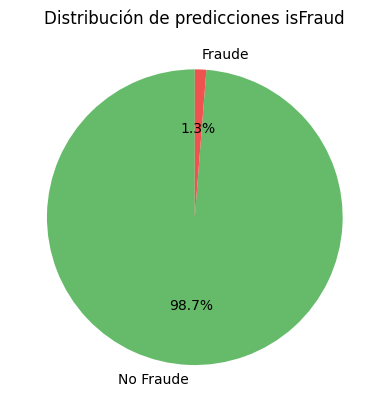

In [ ]:
import matplotlib.pyplot as plt

test_df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Fraude', 'Fraude'], colors=['#66bb6a', '#ef5350'])
plt.title('Distribución de predicciones isFraud')
plt.ylabel('')
plt.show()

Una vez aplicado el modelo de clasificación seleccionado al conjunto de datos de prueba, se obtuvo una distribución de predicciones que refleja una clara predominancia de transacciones no fraudulentas. Específicamente, el modelo clasificó un total de 500,350 transacciones (98.75%) como no fraudulentas, mientras que 6,341 transacciones (1.25%) fueron etiquetadas como fraude potencial.

Esta proporción es coherente con la naturaleza del problema, ya que en escenarios reales de detección de fraude financiero, los eventos fraudulentos tienden a representar un porcentaje reducido del total de transacciones. La capacidad del modelo para identificar una pequeña fracción de eventos sospechosos sugiere que puede ser útil como herramienta de filtrado inicial para priorizar revisiones manuales o sistemas de alerta en ambientes productivos.

Cabe resaltar que, dado que el conjunto de prueba no cuenta con la variable objetivo isFraud, esta distribución no puede ser evaluada directamente mediante métricas como precisión, recall o AUC. Por tanto, la selección del modelo se basó previamente en el desempeño sobre los datos de entrenamiento y validación cruzada, maximizando el AUC como métrica principal de evaluación.